# Name: Tomiwa Tokode

# Email: tokodetomiwa2@gmail.com

## Problem case

Melbourne is one of Australia’s fastest-growing cities, attracting both international migrants and domestic relocators. This population growth increases demand for housing, particularly in certain suburbs, driving up prices. International migrants, domestic relocators and home buyers have difficulties assigning value on a given house across different regions

The goal of this project is to develop a robust predictive model for estimating house prices in Melbourne, Australia, by leveraging location-based characteristics such as suburb, distance to the city center, latitude, longitude, date of sale, and land size. The model aims to capture and analyze the influence of socioeconomic factors such as Economic and employment hubs, urban development trends, and government policies on property values across different regions.

The prediction of house prices accurately based on these location-based characteristics is crucial for various stakeholders such as real estate investors, and home buyers. 

## Business case for an ML model

By accurately predicting property prices, the model will provide actionable insights for a wide range of stakeholders, including real estate investors, urban planners, government agencies, and homebuyers

# 1. Data Collection and Preparation

## Task 1.1: Download the dataset from Kaggle or another source

The data was collected at Kaggle and the link to the dataset is attached alongside
https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market/data?select=Melbourne_housing_FULL.csv

In [10]:
# import the necessary libraries and dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display # for markdown function
def printmd(string):
    display(Markdown(string))

pd.set_option('display.float_format', '{:.2f}'.format)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import numpy as np

np.random.seed(42)

In [11]:
# Setting a path to store charts, and graphs generated from the project

from pathlib import Path

IMAGES_PATH = Path() / "images" / "classification"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Task 1.2: Load the dataset into a Pandas DataFrame

In [13]:
# import packages cell

mel = pd.read_csv("Melbourne_housing_FULL.csv", sep=',', encoding= 'latin1')

In [14]:
mel.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.50,3067.00,...,1.00,1.00,126.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
1,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,...,1.00,1.00,202.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
2,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,...,1.00,0.00,156.00,79.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.50,3067.00,...,2.00,1.00,0.00,NaN,NaN,Yarra City Council,-37.81,145.01,Northern Metropolitan,4019.00
4,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,...,2.00,0.00,134.00,150.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00


In [15]:
# Identify my features of interest
# Suburb: Suburb
# Landsize: Land Size in Metres
# Distance: Distance from CBD(central business district)
# Postcode
# Regionname: General Region (West, North West, North, Northeast …etc)
# Latitude
# Longitude
# Propertycount: Number of properties that exist in the suburb
# date- date sold
# price - House price

In [16]:
# Subsetting the features of interest into a new data frame
mel_1 = mel[['Suburb', 'Landsize', 'Distance', 'Postcode', 'Regionname', 'Lattitude', 'Longtitude', 'Propertycount', 'Date', 'Price']]

In [17]:
mel_1.head()

,Suburb,Landsize,Distance,Postcode,Regionname,Lattitude,Longtitude,Propertycount,Date,Price
0,Abbotsford,126.00,2.50,3067.00,Northern Metropolitan,-37.80,145.00,4019.00,3/09/2016,NaN
1,Abbotsford,202.00,2.50,3067.00,Northern Metropolitan,-37.80,145.00,4019.00,3/12/2016,1480000.00
2,Abbotsford,156.00,2.50,3067.00,Northern Metropolitan,-37.81,144.99,4019.00,4/02/2016,1035000.00
3,Abbotsford,0.00,2.50,3067.00,Northern Metropolitan,-37.81,145.01,4019.00,4/02/2016,NaN
4,Abbotsford,134.00,2.50,3067.00,Northern Metropolitan,-37.81,144.99,4019.00,4/03/2017,1465000.00


In [18]:
# The latitude and longitude features are dropped because we have the postcode feature already there to avoid multicollinearity

mel_1.drop( columns = ['Lattitude', 'Longtitude'], axis = 1, inplace = True)

In [19]:
,# Looking at the features and observations of the dataset
mel_1.shape

(34857, 8)

In [20]:
# The overall detail of the dataset

mel_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Landsize       23047 non-null  float64
 2   Distance       34856 non-null  float64
 3   Postcode       34856 non-null  float64
 4   Regionname     34854 non-null  object 
 5   Propertycount  34854 non-null  float64
 6   Date           34857 non-null  object 
 7   Price          27247 non-null  float64
dtypes: float64(5), object(3)
memory usage: 2.1+ MB


In [21]:
# Checking the columns in the dataset

mel_1.columns

Index(['Suburb', 'Landsize', 'Distance', 'Postcode', 'Regionname',
       'Propertycount', 'Date', 'Price'],
      dtype='object')

In [22]:
mel_1.describe().T

,count,mean,std,min,25%,50%,75%,max
Landsize,23047.00,593.60,3398.84,0.00,224.00,521.00,670.00,433014.00
Distance,34856.00,11.18,6.79,0.00,6.40,10.30,14.00,48.10
Postcode,34856.00,3116.06,109.02,3000.00,3051.00,3103.00,3156.00,3978.00
Propertycount,34854.00,7572.89,4428.09,83.00,4385.00,6763.00,10412.00,21650.00
Price,27247.00,1050173.34,641467.13,85000.00,635000.00,870000.00,1295000.00,11200000.00


In [23]:
mel_2 = mel_1.copy() # preserving original version before modification

## Task 1.3: Inspect the dataset for missing values and handle them appropriately

### Removing Duplicates

In [26]:
# Datasets contains several duplicates
mel_1.duplicated().sum()

631

In [27]:
mel_2.drop_duplicates(inplace = True)

In [28]:
# checking for missing values

mel_2.isna().sum()

Suburb               0
Landsize         11257
Distance             1
Postcode             1
Regionname           3
Propertycount        3
Date                 0
Price             7040
dtype: int64

In [29]:
#missing data
total = mel_2.isnull().sum().sort_values(ascending=False)
percent = (mel_2.isnull().sum()/mel_2.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Landsize,11257,0.33
Price,7040,0.21
Regionname,3,0.00
Propertycount,3,0.00
Distance,1,0.00
Postcode,1,0.00
Suburb,0,0.00
Date,0,0.00


<Axes: >

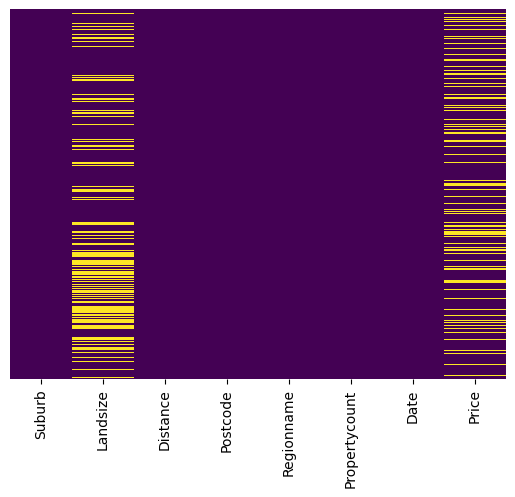

In [30]:
# Visualizing the percentage of missing data in the dataset
# It is deduced from the visuals that the missing values are at random 

sns.heatmap(mel_1.isna(), yticklabels=False, cbar=False, cmap='viridis')

## Task 1.4: Perform data cleaning to ensure the dataset is ready for analysis

Columns that are missing include price, distance, postcode, landsize, regioname, propertycount

Handling Distance, Postcode, regioname, Propertycount features

In [34]:
# The below features missing values are dropped because their missing values are relatively small
mel_2 = mel_2.dropna(subset = ['Distance', 'Postcode', 'Regionname', 'Propertycount'])
mel_2.shape

(34223, 8)

Handling Landsize

<Axes: >

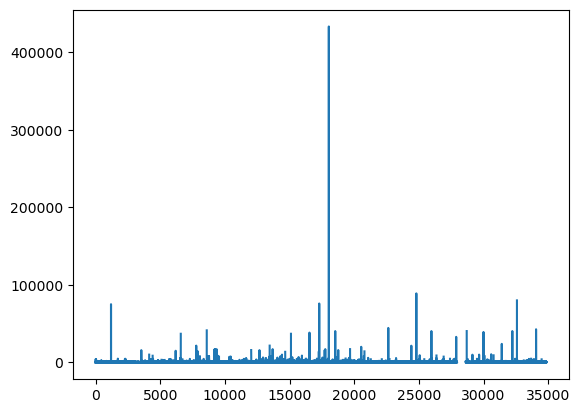

In [36]:
mel_2['Landsize'].plot()

In [37]:
# Impute missing Landsize values by the median within each Suburb and Region name
# The assumption here is that the Landsize could be Missing Not at Random (MNAR) 
# if missing values correlate with the year built (e.g., missing Landsize correlates for houses that are old).

mel_2['Landsize'] = mel_2.groupby(['Suburb','Regionname'])['Landsize'].transform(lambda x: x.fillna(x.mean()))

<Axes: >

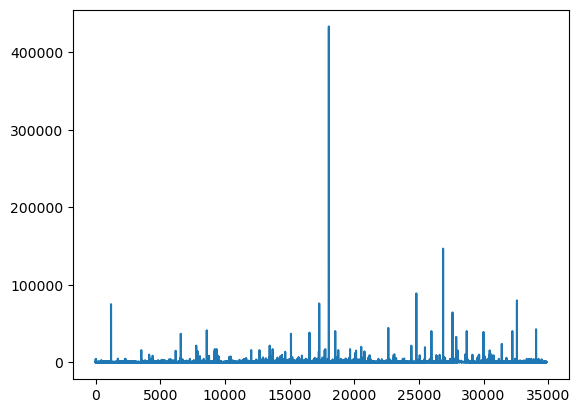

In [38]:
mel_2['Landsize'].plot()

In [39]:
# After filling in the missing values for Landsize, 90 missing values were left, and this will be dropped along with the null values in the price feature
mel_2.isnull().sum()

Suburb              0
Landsize           90
Distance            0
Postcode            0
Regionname          0
Propertycount       0
Date                0
Price            7040
dtype: int64

Handling Price

In [41]:
# Price is the predictor variable, its values are relatively small and account for 20 % of the dataset, the rows are removed to avoid introducing bias or inaccuracies
# Remove rows where Price is missing
mel_2 = mel_2.dropna()

In [42]:
mel_2.isnull().sum()

Suburb           0
Landsize         0
Distance         0
Postcode         0
Regionname       0
Propertycount    0
Date             0
Price            0
dtype: int64

In [43]:
mel_2.shape

(27110, 8)

# 2. Exploratory Data Analysis

## Task 2.1: Conduct exploratory data analysis to understand the distribution of features and the target variable (house prices).

### Analyzing the Sale Price

In [47]:
# looking out the distribution of the Sale price with other predictor variables
mel_2.describe().T

,count,mean,std,min,25%,50%,75%,max
Landsize,27110.00,593.23,3122.06,0.00,323.00,530.00,650.00,433014.00
Distance,27110.00,11.27,6.79,0.00,6.40,10.40,14.00,48.10
Postcode,27110.00,3113.66,110.52,3000.00,3046.00,3088.00,3153.00,3977.00
Propertycount,27110.00,7573.06,4492.31,83.00,4380.00,6567.00,10412.00,21650.00
Price,27110.00,1051094.73,642530.06,85000.00,635000.00,872000.00,1300000.00,11200000.00


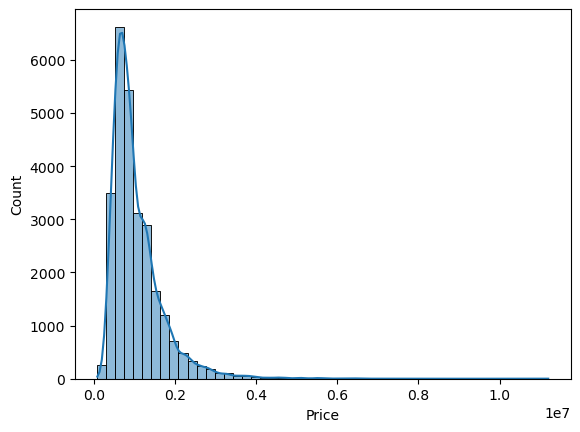

Our target variable, **Price** is positvely skewed, and it shows peakedness

In [48]:
# showing the distribution of the Price feature on an histogram
sns.histplot(mel_2, x = 'Price', bins = 50, kde = True)
plt.show()
printmd('Our target variable, **Price** is positvely skewed, and it shows peakedness')

In [49]:
print(f' {mel_2.Price.skew()}')
print(f' {mel_2.Price.kurt()}')
print('\n')
print(f'There target variable is highly skewed and the Kurtosis which is than 3 suggest the presence of outliers')

 2.5848141394267357
 13.054937810674282


There target variable is highly skewed and the Kurtosis which is than 3 suggest the presence of outliers


### Analyzing the numerical features Postcode, Landsize, Distance, Propertycount

In [51]:
# looking out hte skewness of the data points
mel_2.skew(numeric_only = True)

Landsize        105.22
Distance          1.47
Postcode          3.96
Propertycount     1.01
Price             2.58
dtype: float64

In [52]:
mel_2.kurt(numeric_only = True)

Landsize        13824.10
Distance            3.46
Postcode           21.78
Propertycount       0.91
Price              13.05
dtype: float64

#### Assumptions from the distribution
The standard deviation suggests that the data points are widely spread out from the mean, indicating a high level of variability within the dataset. Landsize, propertycount, and Price have a high standard deviation number, revealing how the data points are spread out from the mean. 

All of the numerical features are highly skewed in a positive direction, and All numerical features indicate a presence of outliers except for Propertycount, which depicts a platykurtic distribution.

### Looking out the distribution of categorical columns Suburb, Regioname

Suburb
Reservoir         722
Bentleigh East    491
Richmond          438
Preston           415
Brunswick         386
                 ... 
Yarra Glen          1
Wildwood            1
Monbulk             1
Montrose            1
Kalkallo            1
Name: count, Length: 335, dtype: int64

<Axes: xlabel='Suburb'>

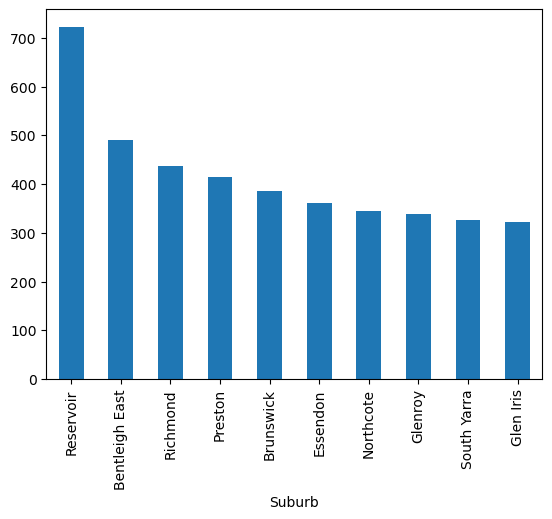

In [55]:
display (mel_2['Suburb'].value_counts())
display (mel_2['Suburb'].value_counts().head(10).plot.bar()) # Top 10 Subburb that occur the most frequently in the datasets

Regionname
Southern Metropolitan         8506
Northern Metropolitan         7778
Western Metropolitan          5802
Eastern Metropolitan          3265
South-Eastern Metropolitan    1336
Northern Victoria              166
Eastern Victoria               162
Western Victoria                95
Name: count, dtype: int64

<Axes: xlabel='Regionname'>

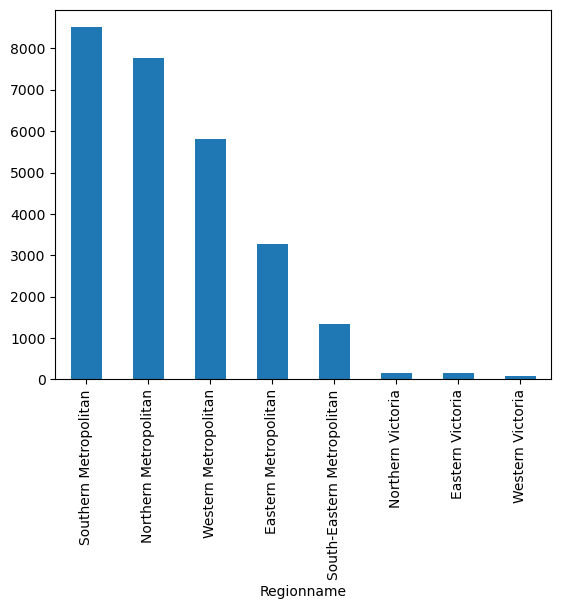

In [56]:
display (mel_2['Regionname'].value_counts())
display (mel_2['Regionname'].value_counts().plot.bar()) 

### Relationships among the target variable (Price) and other predictor variables

In [58]:
price_correlation = mel_2.corr(numeric_only = True)['Price'].sort_values(ascending=False)
price_correlation

# These are the predictor variables sorted in descending order starting with the most correlated one, the Postcode
# The results below, depict that the numerical features exhibit a weak relationship with one another

Price            1.00
Postcode         0.05
Landsize         0.03
Propertycount   -0.06
Distance        -0.21
Name: Price, dtype: float64

In [59]:
mel_2.columns

Index(['Suburb', 'Landsize', 'Distance', 'Postcode', 'Regionname',
       'Propertycount', 'Date', 'Price'],
      dtype='object')

## Task 2.2: Visualize the relationships between features and the target variable using scatter plots, histograms, and box plots

### Visualizing numerical relationships using Histogram

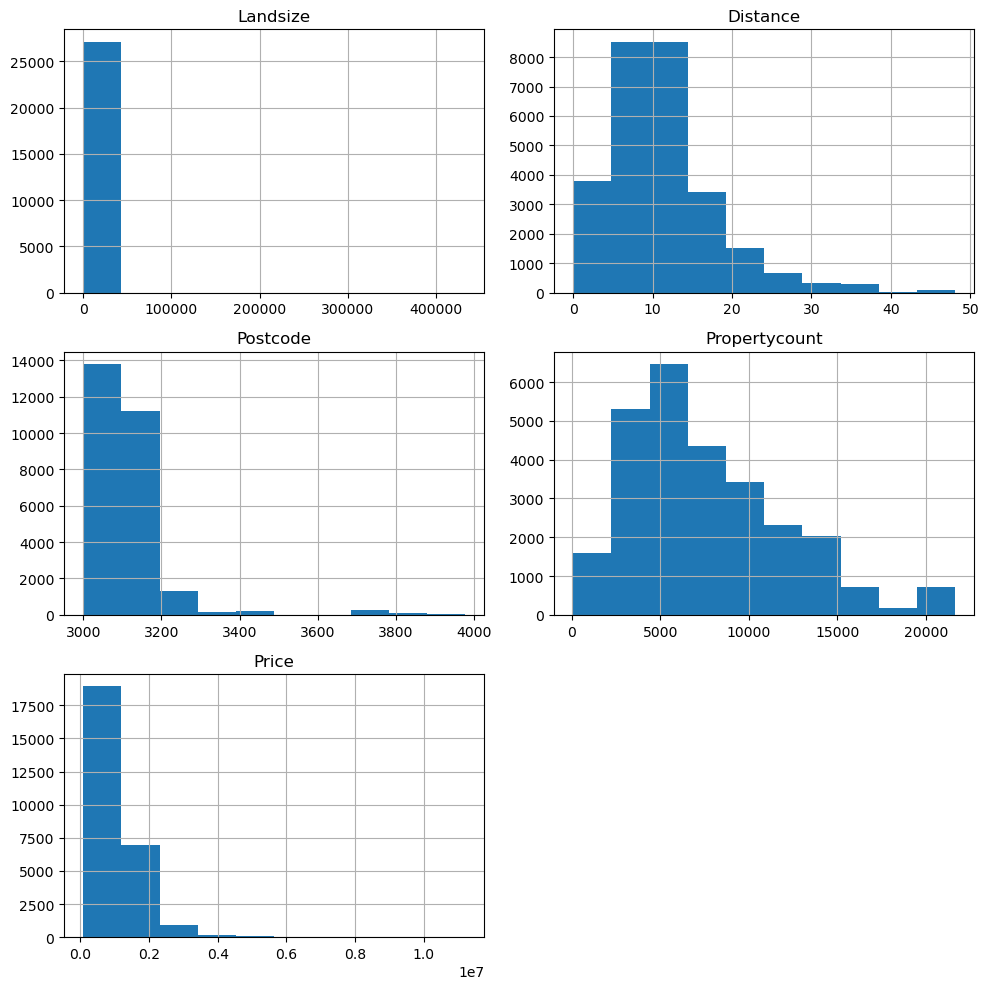

In [62]:
# Creating a features variable while passing a list of 5 numerical features we will be working with
features = ['Landsize', 'Distance', 'Postcode', 'Propertycount', 'Price']
Histogram_viz = mel_2[features].hist(figsize=(10,10))

save_fig("Histogram_viz")  

# Optional: Show the plot (if needed)  
plt.show() 

#### The skewness of the features might suggest the following;

1. Landsize (Skewness: 105.215038)*Interpretation*: This extremely high positive skewness suggests that the distribution of land sizes is heavily right-skewed. There may be many properties with relatively small land sizes, but a few properties have significantly larger land sizes, creating a long tail on the right. This could indicate a market where a few large estates significantly influence the average land size


2.  Distance (Skewness: 1.41.474192)
Interetp***ion: A positive skewness signifies that the distribution of distances is righ stkewes: Most properties may be located cloestoo the CBD(Central Business Distritr), while some are located further away. This could suggest a tendency for buyers to prefer properties near uabrnra eas, leading to a few outliers that are much fur
**
3. Postcode (Skewn: e.3*8**038nt)
Ip*e**tation: A high positive skewness for postcode indicates that the distribution is highly rig-ewedions: This might suggest that certain areas (postcodes) are much more populated or desired than others, leading to a concentration of properties in a few desirable locations and fewer properties in less ra  *e*
*5s.
4. Propertycounewness(Ss1**.**0117)Ie**r**pretation: A positive skewness indicates that the distribution is alshto sliglrations: This could imply that most areas have a relativelylow npumbpr of  roperties, with a few areas having a significaitly hegheerty p rty count. This might relate to urban density vrus sul** **
a7eas.ce
(s5. Pre****:** 581
I**n**terpretation: A high positive skewness indicates that the priibce distrun is r**implications: This means that most properties have lower prices, with a few luxury or premium properties tausing hhe thil on t e right side. This distribution is common in real estate markets where there are many affordable homes and a few high-value properties

## Visualizing numerical relationships using Scatter plots

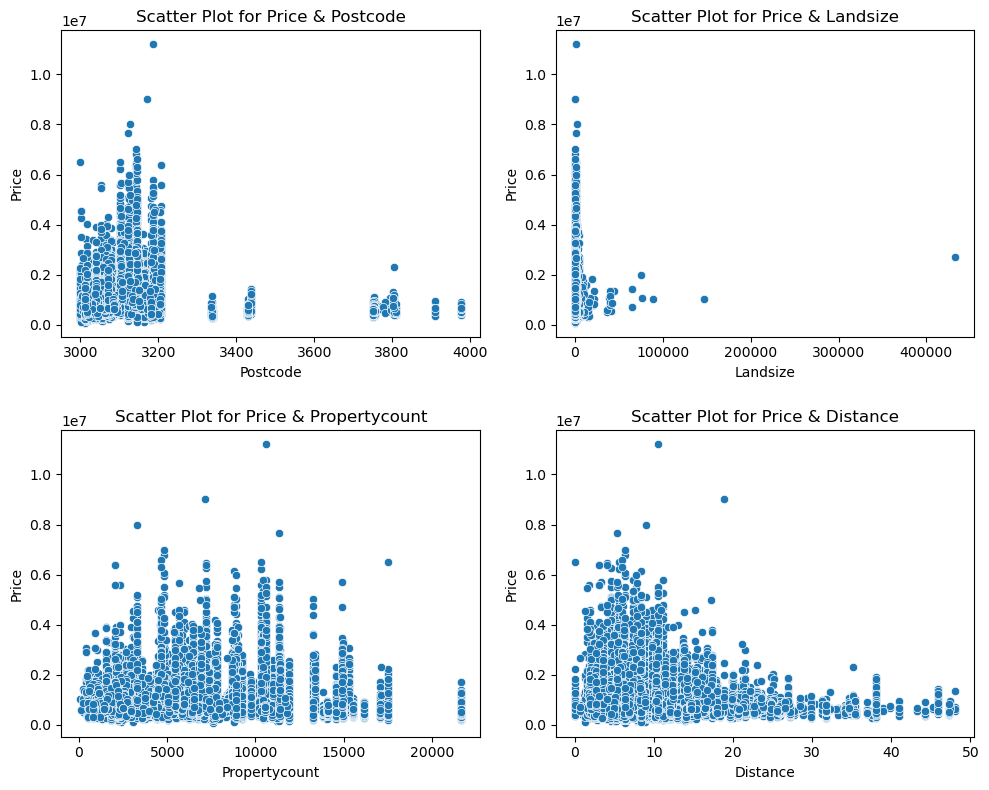

In [65]:
# Create subplots for multiple scatter plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Scatter plot 1
sns.scatterplot(x='Postcode', y='Price', data=mel_2, ax=axes[0, 0])
axes[0, 0].set_title('Scatter Plot for Price & Postcode')

# Scatter plot 2
sns.scatterplot(x='Landsize', y='Price', data=mel_2, ax=axes[0, 1])
axes[0, 1].set_title('Scatter Plot for Price & Landsize')

# Scatter plot 3
sns.scatterplot(x='Propertycount', y='Price', data=mel_2, ax=axes[1, 0])
axes[1, 0].set_title('Scatter Plot for Price & Propertycount')

# scatter plot 4
sns.scatterplot(x='Distance', y='Price', data=mel_2, ax=axes[1, 1])
axes[1, 1].set_title('Scatter Plot for Price & Distance')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

In [66]:
# The above distribution using scatter plots shows no obvious linear relationship between the target and predictor variables

## Visualizing relationships using Box plots

In [68]:
mel_2.columns

Index(['Suburb', 'Landsize', 'Distance', 'Postcode', 'Regionname',
       'Propertycount', 'Date', 'Price'],
      dtype='object')

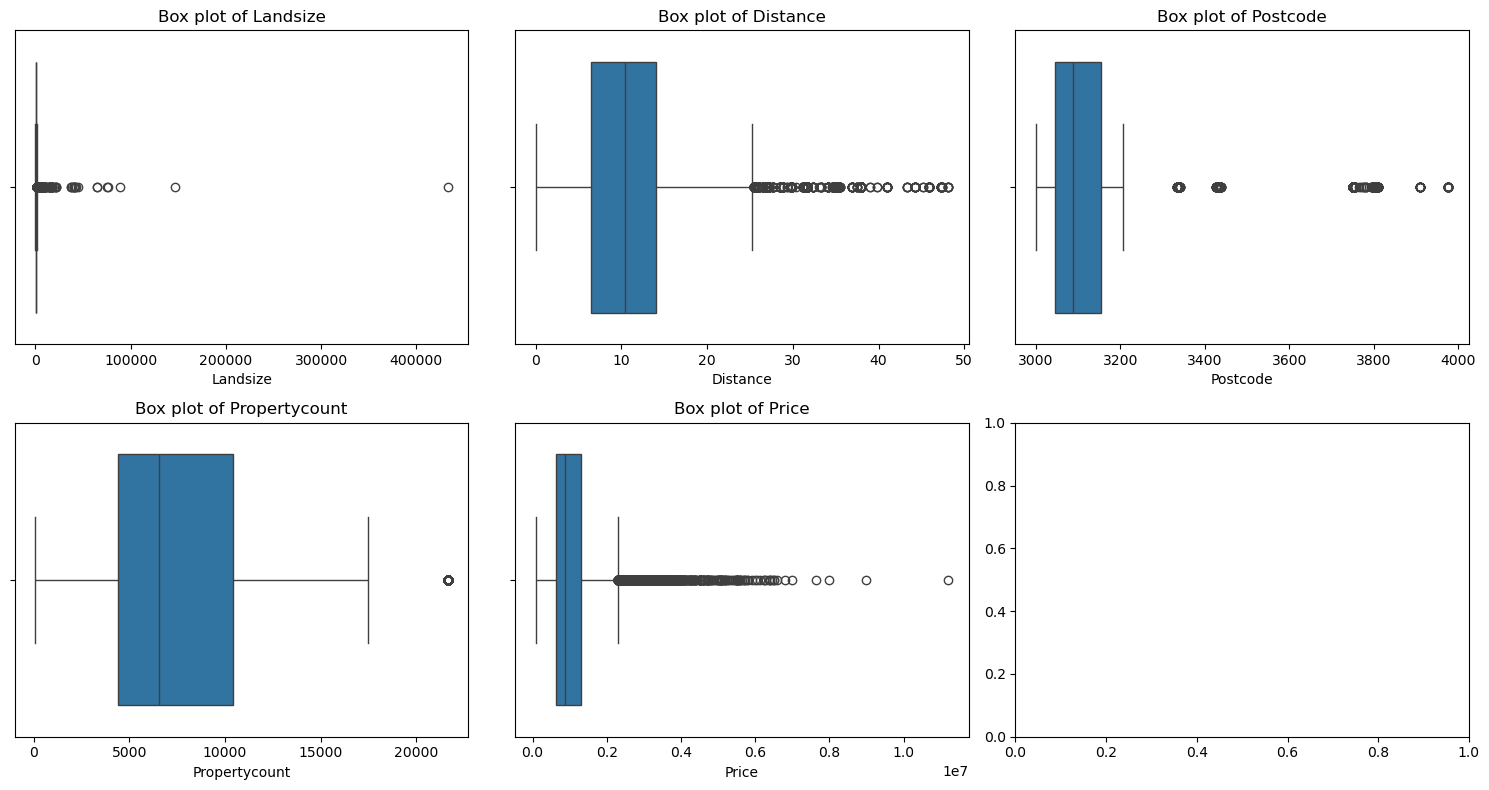

In [69]:
# Create subplots for multiple box plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

sns.boxplot(x= 'Landsize', data = mel_2, ax=axes[0, 0])
axes[0, 0].set_title('Box plot of Landsize')

sns.boxplot(x= 'Distance', data = mel_2, ax=axes[0, 1])
axes[0, 1].set_title('Box plot of Distance')

sns.boxplot(x= 'Postcode', data = mel_2, ax=axes[0, 2])
axes[0, 2].set_title('Box plot of Postcode')

sns.boxplot(x= 'Propertycount', data = mel_2, ax=axes[1, 0])
axes[1, 0].set_title('Box plot of Propertycount')

sns.boxplot(x= 'Price', data = mel_2, ax=axes[1, 1] )
axes[1, 1].set_title('Box plot of Price')

plt.tight_layout()
plt.show()

## Task 2.3: Identify and handle outliers in the dataset

In [71]:
# For the handling of the outliers, I will be looking at numerical features that have a high Kurtosis
# For the numerical features that have extreme values (Outliers), a little of the outliers will be removed, at preprocessing the dataset will be normalized and standrdized

### Postcode

In [73]:
display(mel_2[mel_2['Postcode'] > 3900.0]['Postcode'].value_counts().sum()) # returns the number of Postcode data points that are greater than 3900.0
print('\n')
display(mel_2[['Postcode']].value_counts()) # counts of Postcode

46

Postcode
3073.00     722
3020.00     542
3046.00     542
3165.00     491
3121.00     488
           ... 
3775.00       1
3160.00       1
3770.00       1
3765.00       1
3139.00       1
Name: count, Length: 205, dtype: int64

In [74]:
display(mel_2.Postcode.max()) # highest Postcode
display(mel_2.sort_values(by = 'Postcode', ascending = False).head()) # sorting the postcode in descending order from the highest to the lowest

3977.0

,Suburb,Landsize,Distance,Postcode,Regionname,Propertycount,Date,Price
31325,Sandhurst,390.00,34.70,3977.00,South-Eastern Metropolitan,1721.00,10/02/2018,640000.00
15946,Skye,534.00,34.70,3977.00,South-Eastern Metropolitan,2756.00,17/06/2017,555698.00
19388,Cranbourne North,579.00,34.70,3977.00,South-Eastern Metropolitan,6464.00,29/07/2017,500000.00
29410,Cranbourne West,564.00,34.70,3977.00,South-Eastern Metropolitan,4939.00,6/01/2018,517250.00
14326,Cranbourne,581.00,34.70,3977.00,South-Eastern Metropolitan,7680.00,1/07/2017,572000.00


In [75]:
# creating a copy of the dataset before removing outliers
mel_3 = mel_2.copy()

# dropping the outlier
mel_3 = mel_3[mel_3['Postcode'] <= 3900.0]

<Axes: xlabel='Postcode'>

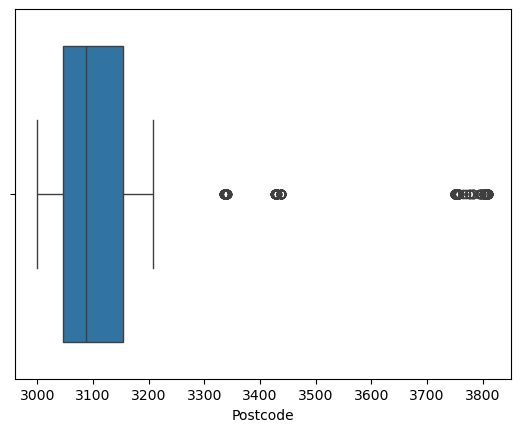

In [76]:
sns.boxplot(data=mel_3, x='Postcode') # visualizing the boxplot after outliers have been removed

### Price

In [78]:
display(mel_3[mel_3['Price'] > 7000000]['Price'].value_counts().sum()) # returning the number of price data points that are greater than 7000000
print('\n')
display(mel_3[['Price']].value_counts()) # displaying the count of price

4

Price      
1100000.00     234
600000.00      234
650000.00      216
800000.00      211
1300000.00     208
              ... 
1159000.00       1
1151500.00       1
1149000.00       1
1148000.00       1
11200000.00      1
Name: count, Length: 2866, dtype: int64

In [79]:
display(mel_3.Price.max()) # highest price value
display(mel_3.sort_values(by = 'Price', ascending = False).head()) # sorting the Price in descending order from the highest to the lowest

11200000.0

,Suburb,Landsize,Distance,Postcode,Regionname,Propertycount,Date,Price
25635,Brighton,1400.00,10.50,3186.00,Southern Metropolitan,10579.00,28/10/2017,11200000.00
19583,Mulgrave,744.00,18.80,3170.00,South-Eastern Metropolitan,7113.00,29/07/2017,9000000.00
12539,Canterbury,2079.00,9.00,3126.00,Southern Metropolitan,3265.00,13/05/2017,8000000.00
15696,Hawthorn,1690.00,5.30,3122.00,Southern Metropolitan,11308.00,17/06/2017,7650000.00
28334,Armadale,361.94,6.30,3143.00,Southern Metropolitan,4836.00,25/11/2017,7000000.00


In [80]:
# The above dataset is revealing something interesting price of a property be very high and yet the Landsize is relatively small,
# This could have been an error in data entry 

<Axes: xlabel='Price'>

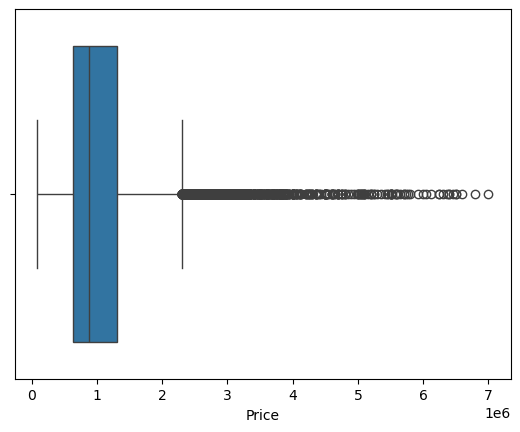

In [81]:
# Dropping the outlier data points

mel_3 = mel_3[mel_3['Price'] <= 7000000]
sns.boxplot(data=mel_3, x='Price') # visualizing the boxplot after outliers have been removed

### Landsize 

In [83]:
display(mel_3[mel_3['Landsize'] > 100000]['Landsize'].value_counts().sum()) # returns the number of Landsize data points that are greater than 100000
print('\n')
display(mel_3[['Landsize']].value_counts())  # counts of Postcode

2

Landsize 
0.00         1939
578.22        291
493.47        194
650.00        161
465.15        145
             ... 
1491.00         1
1490.00         1
1489.00         1
1488.00         1
433014.00       1
Name: count, Length: 1841, dtype: int64

In [84]:
display(mel_3.Landsize.max()) # Highest Landsize value
display(mel_3.sort_values(by = 'Landsize', ascending = False).head()) # sorting the Landsize in descending order from the highest to the lowest

433014.0

,Suburb,Landsize,Distance,Postcode,Regionname,Propertycount,Date,Price
18036,Fitzroy,433014.00,2.10,3065.00,Northern Metropolitan,5825.00,12/08/2017,2700000.00
26868,Bullengarook,146699.00,45.90,3437.00,Northern Victoria,249.00,11/11/2017,1050000.00
24800,Wildwood,89030.00,31.70,3429.00,Western Metropolitan,83.00,14/10/2017,1030000.00
17293,Silvan,76000.00,34.60,3795.00,Eastern Victoria,457.00,27/05/2017,1085000.00
1198,Balwyn North,75100.00,9.20,3104.00,Southern Metropolitan,7809.00,28/08/2016,2000000.00


<Axes: xlabel='Landsize'>

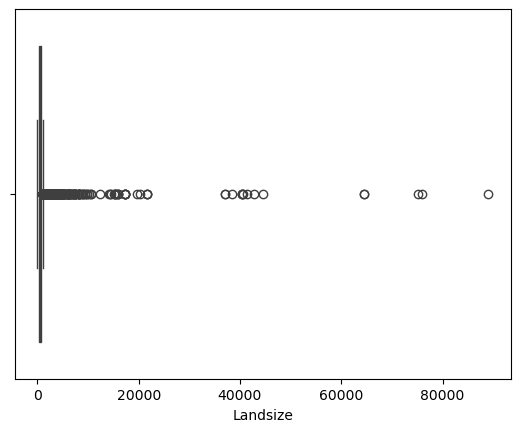

In [85]:
# dropping the outlier

mel_3 = mel_3[mel_3['Landsize'] <= 100000]
sns.boxplot(data=mel_3, x='Landsize') # visualizing the boxplot after outliers have been removed

In [86]:
# because of the significance of our outlier I handled it by removing extreme values that will skew the dataset

In [87]:
mel_2.shape

(27110, 8)

# 3. Feature Engineering

## Task 3.1: Create new features that may help improve the model's performance

#### Insight into Distance and mean price of houses: Does closeness to the CBD(Central Business District) lead to an increase in house prices, Properties closer to the CBD tend to have higher prices due to better access to jobs, amenities, and transportation

,Distance,Avg_price
0,9.00,2096432.84
1,5.60,1828475.76
2,3.00,1792593.46
3,5.40,1761223.65
4,7.40,1754871.62
...,...,...
201,35.50,489000.00
202,17.40,482798.39
203,27.70,476250.00
204,29.80,428679.17


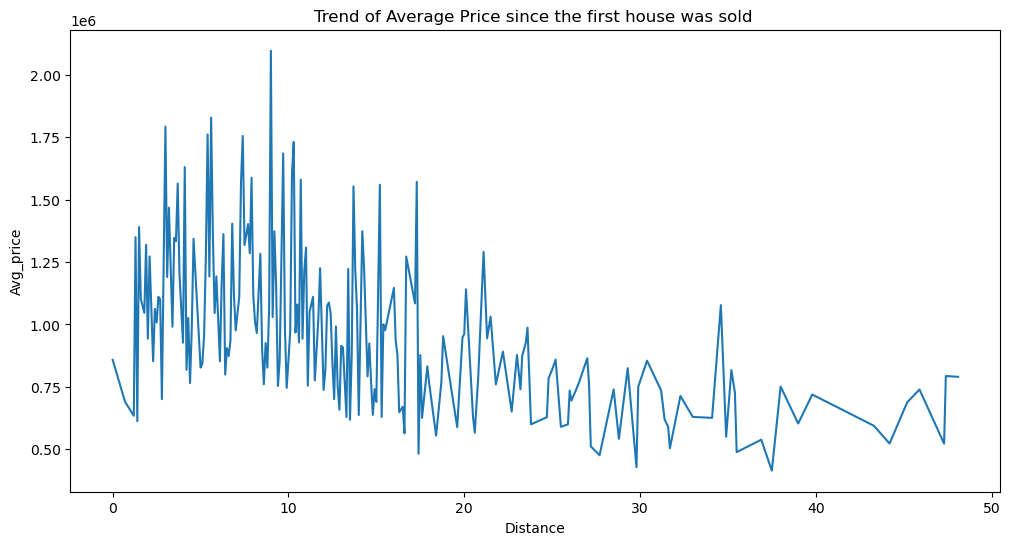

In [91]:
distance_price= mel_3.groupby('Distance')['Price'].agg(Avg_price = 'mean').sort_values(by = 'Avg_price', ascending = False)
display(distance_price.reset_index())

# Visualizing the result

plt.figure(figsize = (12,6))
sns.lineplot(data =distance_price , x= 'Distance', y='Avg_price')
plt.title('Trend of Average Price since the first house was sold ')
plt.tight_layout
plt.show()

The chart shows that there is a downtrend of prices as the distance is farther from the Central Business District, which suppors our hypothesis

The farther the distance from CBD the lower the price

#### Insight into the property count of each Suburb and its relationship with the Average price of houses

Does high property count in a particular suburb lead to high house sales

,Propertycount,avg_price
0,3265.00,2319440.48
1,2019.00,2232148.15
2,4675.00,2087618.64
3,892.00,2001785.71
4,10579.00,1957284.15
...,...,...
317,3600.00,434583.33
318,4718.00,423691.96
319,2871.00,423000.00
320,3553.00,380653.85


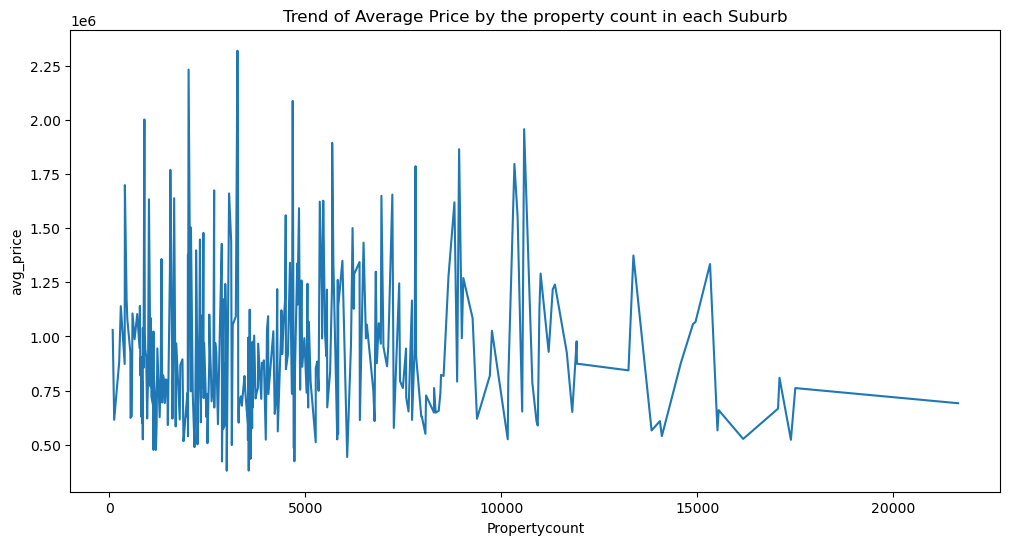

In [94]:
prop_price=mel_3.groupby('Propertycount')['Price'].agg(avg_price = 'mean').sort_values(by = 'avg_price', ascending = False)
display(prop_price.reset_index())

# Visualizing the result
plt.figure(figsize = (12,6))
sns.lineplot(data =prop_price , x= 'Propertycount', y='avg_price')
plt.title('Trend of Average Price by the property count in each Suburb')
plt.tight_layout
plt.show()

The result of this chart does not support our assumption as most Suburbs that have low property counts within the range of 0 - 5000 have high average prices while suburbs that tend to have high Property counts show low average prices.

#### Insight into the Landsize of each Suburb and its relationship with the Average price of houses

Does high Landsize in a particular suburb lead to high house sales

,Landsize,avg_price
0,1334.00,6500000.00
1,1384.00,6125000.00
2,1338.00,6000000.00
3,1276.00,5800000.00
4,1671.00,5700000.00
...,...,...
1834,44.00,245000.00
1835,1996.00,230000.00
1836,1175.00,200000.00
1837,2347.00,185000.00


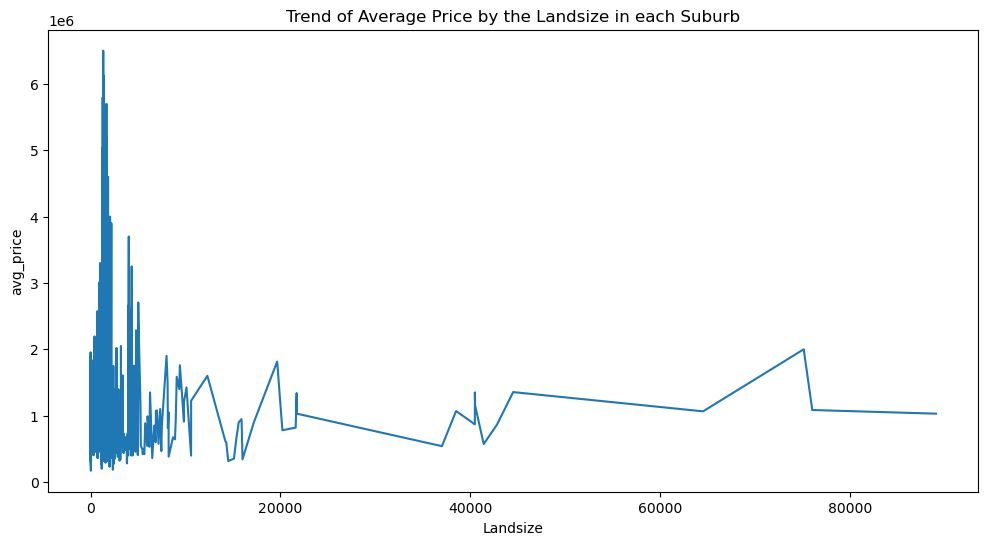

In [97]:
land_price=mel_3.groupby('Landsize')['Price'].agg(avg_price = 'mean').sort_values(by = 'avg_price', ascending = False)
display(land_price.reset_index())

# Visualizing the result
plt.figure(figsize = (12,6))
sns.lineplot(data =land_price , x= 'Landsize', y='avg_price')
plt.title('Trend of Average Price by the Landsize in each Suburb')
plt.tight_layout
plt.show()

From the above chart Clusters of Landsizes wihin the range of 0 - 1000 have an alternating expensive and low average house prices, while land size between 2000 upwards have a reltively low house price. 

In [99]:
# Checking the effect of multiple features on the price
def price_effect(df, columns, column = 'Price' ):
    price_eff = mel_3.groupby(columns)[column].agg(Avg_price = 'mean').sort_values(by = 'Avg_price', ascending = False)
    return price_eff

In [100]:
# mel_3.groupby(['Suburb', 'Distance'])['Price'].agg(Avg_price = 'mean').sort_values(by = 'Avg_price', ascending = False) # looking at the effect of distance on SUburb

In [101]:
# Effect of price on the Suburb by distance
# It can be deduced from the below that the shorter the distance between the Suburb and CBD the greater the price and vice versa

price_effect(mel_3, ['Suburb', 'Distance'], 'Price')

,,Avg_price
Suburb,Distance,
Middle Park,3.00,2676892.86
Canterbury,8.40,2425500.00
Malvern,5.90,2333858.49
Canterbury,9.00,2223022.73
Brighton,10.50,2032202.55
...,...,...
Melton,31.70,434583.33
Melton South,29.80,423691.96
Bacchus Marsh,37.50,423000.00


In [102]:
# Effect of price on the Suburb by Landsize
price_effect(mel_3, ['Suburb', 'Landsize'], 'Price')

Avg_price
Suburb      Landsize           
Kew         1334.00  6500000.00
Middle Park 553.00   6400000.00
            476.00   6370000.00
Malvern     900.00   6300000.00
Toorak      564.00   6250000.00
...                         ...
Brunswick   1250.00   170000.00
Footscray   30.00     170000.00
Hawthorn    322.00    160000.00
Albion      36.00     145000.00
Caulfield   499.00    131000.00

[14357 rows x 1 columns]

In [103]:
# Based on our business problem which is to predict the house prices in Melbourne based on location specific characeristics

In [104]:
# Engineering a new feature from the Date feature

### 1st Feature: Does the price of a house change over time

In [106]:
# Convert the Date column to DateTime format
mel_3['Date'] = pd.to_datetime(mel_3['Date'], format='%d/%m/%Y')

In [107]:
# Calculate the number of days since a reference date (e.g., the earliest sale date in the dataset). 
# This feature can capture how house prices change over time.

mel_3['DaysSince'] = (mel_3['Date'] - mel_3['Date'].min()).dt.days # Calculate the number of days since the earliest date in the dataset

In [108]:
display(mel_3.Date.min())
display(mel_3.Date.max())
display(mel_3.DaysSince.min())
display(mel_3.DaysSince.max())

Timestamp('2016-01-28 00:00:00')

Timestamp('2018-03-17 00:00:00')

0

779

In [109]:
# providing context
# the dayssince ranges from 0 - 779, from the above 779 means the number of days since the first house was sold in January 2016, on the 28th day
daysince = mel_3.groupby('DaysSince')['Price'].agg(averageprice = 'mean').sort_values(by = 'averageprice', ascending = False)
daysince.reset_index()

,DaysSince,averageprice
0,310,1197114.13
1,471,1194270.09
2,408,1190125.00
3,304,1187041.76
4,478,1178495.48
...,...,...
73,744,800574.37
74,772,795112.05
75,723,775150.00
76,737,752062.50


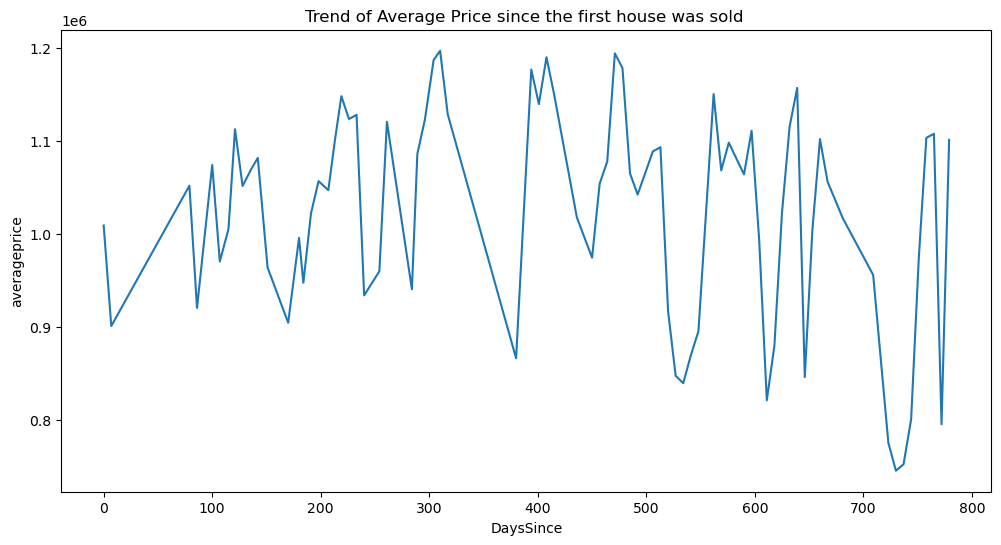

In [110]:
# A trend showing the Average price since the first house was sold
plt.figure(figsize = (12,6))
sns.lineplot(data =daysince , x= 'DaysSince', y='averageprice')
plt.title('Trend of Average Price since the first house was sold ')
plt.tight_layout
plt.show()

In [111]:
# The above chart relatively do not follow a direct pattern but it shows some peaks between the 300 - 500 days since the first house was sold

### 2nd Feature : Creating a ordinal class for our target price feature, this helps the model interprete how ordered the prices are.

In [113]:
# count of Subburbs that are expensive, moderate and low

In [114]:
# Classifying the price column into 3 variables
display(np.percentile(mel_3.Price, 33.33))
display(np.percentile(mel_3.Price, 66.67))

707000.0

1122000.0

In [115]:
# Creating new features for bank data based on the quantile values

mel_3['PriceClass'] = 'Low'

mel_3.loc[(mel_3['Price'] > 707000) & (mel_3['Price'] < 1122000), 'PriceClass'] = 'Moderate'

mel_3.loc[mel_3['Price'] > 1122000, 'PriceClass'] = 'Expensive'

mel_3.head()

,Suburb,Landsize,Distance,Postcode,Regionname,Propertycount,Date,Price,DaysSince,PriceClass
1,Abbotsford,202.00,2.50,3067.00,Northern Metropolitan,4019.00,2016-12-03,1480000.00,310,Expensive
2,Abbotsford,156.00,2.50,3067.00,Northern Metropolitan,4019.00,2016-02-04,1035000.00,7,Moderate
4,Abbotsford,134.00,2.50,3067.00,Northern Metropolitan,4019.00,2017-03-04,1465000.00,401,Expensive
5,Abbotsford,94.00,2.50,3067.00,Northern Metropolitan,4019.00,2017-03-04,850000.00,401,Moderate
6,Abbotsford,120.00,2.50,3067.00,Northern Metropolitan,4019.00,2016-06-04,1600000.00,128,Expensive


In [116]:
# From the below I noted that the houses sold low are the most common, followed by the expensive ones
mel_3.groupby(['PriceClass'])['Suburb'].agg(suburbcount='count').reset_index().sort_values(by = 'suburbcount', ascending = False )

,PriceClass,suburbcount
1,Low,9029
0,Expensive,9016
2,Moderate,9013


,,averageprice
Suburb,PriceClass,
Malvern,Expensive,2826871.79
Toorak,Expensive,2772392.41
Canterbury,Expensive,2682308.82
Middle Park,Expensive,2488891.30
Deepdene,Expensive,2488000.00
Armadale,Expensive,2449331.25
Kew,Expensive,2364209.36
East Melbourne,Expensive,2348666.67
Brighton,Expensive,2317972.33


,,averageprice
Suburb,PriceClass,
Huntingdale,Low,427500.00
Bacchus Marsh,Low,423000.00
Ormond,Low,419528.57
Melton,Low,414910.71
Aberfeldie,Low,404571.43
Melton South,Low,395523.58
Seaholme,Low,383500.00
Kurunjang,Low,380653.85
Darley,Low,380000.00


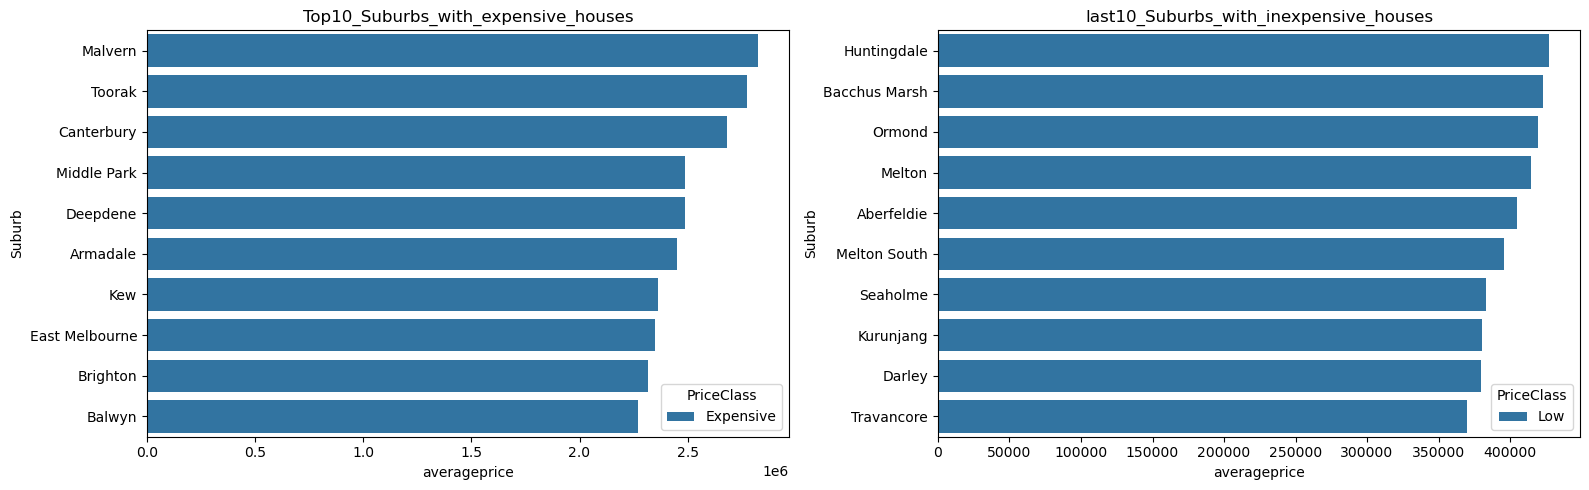

In [117]:
# Looking at the Average price of the house by Suburb
Suburb_top_10 = mel_3.groupby(['Suburb', 'PriceClass'])['Price'].agg(averageprice = 'mean').sort_values(by = 'averageprice', ascending = False).head(10)
Suburb_top_10

Suburb_low_10 = mel_3.groupby(['Suburb', 'PriceClass'])['Price'].agg(averageprice = 'mean').sort_values(by = 'averageprice', ascending = False).tail(10)
Suburb_low_10

display(Suburb_top_10, Suburb_low_10 )

# visualizing the results
fig, ax = plt.subplots(1, 2, figsize=(16,5))

# plotting the Top 5 Suburbs with the expensive houses 
sns.barplot(data = Suburb_top_10, x = 'averageprice', y = 'Suburb', hue = 'PriceClass', ax = ax[0] )
ax[0].set_title('Top10_Suburbs_with_expensive_houses')

# plotting the Top 5 Suburbs with the inexpensive houses 
sns.barplot(data = Suburb_low_10, x = 'averageprice', y = 'Suburb', hue = 'PriceClass', ax = ax[1] )
ax[1].set_title('last10_Suburbs_with_inexpensive_houses')

# plt.yticks(rotation=80)
plt.tight_layout()
plt.show()

In [118]:
mel_3.head()

,Suburb,Landsize,Distance,Postcode,Regionname,Propertycount,Date,Price,DaysSince,PriceClass
1,Abbotsford,202.00,2.50,3067.00,Northern Metropolitan,4019.00,2016-12-03,1480000.00,310,Expensive
2,Abbotsford,156.00,2.50,3067.00,Northern Metropolitan,4019.00,2016-02-04,1035000.00,7,Moderate
4,Abbotsford,134.00,2.50,3067.00,Northern Metropolitan,4019.00,2017-03-04,1465000.00,401,Expensive
5,Abbotsford,94.00,2.50,3067.00,Northern Metropolitan,4019.00,2017-03-04,850000.00,401,Moderate
6,Abbotsford,120.00,2.50,3067.00,Northern Metropolitan,4019.00,2016-06-04,1600000.00,128,Expensive


### 3rd feature: This feature acts as an indicator, helping the model understand each suburb's typical average price level.

Expensive suburbs tend to have expensive properties i.e property count, land size, rooms

In [120]:
# Engineering a new feature Suburb_Avg_Price
mel_3['Suburb_Avg_Price'] = mel_3.groupby('Suburb')['Price'].transform('mean')

### 4th feature: This feature calculates the price relative to the land size, allowing the model to capture how land size impacts value in different areas.

In [122]:
# Calculate the price per square meter of land (Price / Landsize)
mel_3['Price_Per_SqM'] = mel_3['Price'] / mel_3['Landsize']

# Handling any divisions by zero or NaN values
mel_3['Price_Per_SqM'].replace([np.inf, -np.inf], np.nan, inplace=True)
mel_3['Price_Per_SqM'].fillna(0, inplace=True)

mel_3.head()

,Suburb,Landsize,Distance,Postcode,Regionname,Propertycount,Date,Price,DaysSince,PriceClass,Suburb_Avg_Price,Price_Per_SqM
1,Abbotsford,202.00,2.50,3067.00,Northern Metropolitan,4019.00,2016-12-03,1480000.00,310,Expensive,1033549.02,7326.73
2,Abbotsford,156.00,2.50,3067.00,Northern Metropolitan,4019.00,2016-02-04,1035000.00,7,Moderate,1033549.02,6634.62
4,Abbotsford,134.00,2.50,3067.00,Northern Metropolitan,4019.00,2017-03-04,1465000.00,401,Expensive,1033549.02,10932.84
5,Abbotsford,94.00,2.50,3067.00,Northern Metropolitan,4019.00,2017-03-04,850000.00,401,Moderate,1033549.02,9042.55
6,Abbotsford,120.00,2.50,3067.00,Northern Metropolitan,4019.00,2016-06-04,1600000.00,128,Expensive,1033549.02,13333.33


#### Brief Summary 

4 new features were engineered namely DaysSince, PriceClass, Suburb_Avg_Price, and Price_per_SquareMetre
These 4 features will help improve our model performance and increase accuracy

## Task 3.2: Encode categorical variables using one-hot or label encoding techniques

In [125]:
mel_3.Regionname.unique() # checking the unique values of Regioname

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Eastern Victoria',
       'Northern Victoria', 'Western Victoria'], dtype=object)

In [126]:
mel_3.Regionname.nunique()

8

In [127]:
mel_4 = mel_3.copy() # preserving the dataframe before encoding and preprocessing

In [128]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

Dropping the Suburb column

In [130]:
mel_4.drop(columns = 'Suburb', axis = 1, inplace = True)

# The suburb will be dropped because it has too many categories a total of 327 categories
# Using one hot encoder will lead to more memory usage and it will create a binary feature for each category, leading to an increase in dimensionality
# A label encoder would have been the best, but it doesn't work well with linear regression 
# This could also mislead the model by implying an ordinal relationship between the Suburb which might not exist.
# More reason why the average price per Suburb is being created to substitute for this

Encoding Regioname

In [132]:
# Perform one-hot encoding
mel_4 = pd.get_dummies(mel_4, columns=['Regionname'], drop_first = True, dtype = 'float')
mel_4.head()

# One hot encoding is used for the Region name column because the categories are small and they are distinct without any form of order
# The drop first is used because one column is a perfect predictor of the other and they are highly correlated to each other 
# So a column has to be dropped to avoid multicollinearity (dependency among independent variables )

,Landsize,Distance,Postcode,Propertycount,Date,Price,DaysSince,PriceClass,Suburb_Avg_Price,Price_Per_SqM,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
1,202.00,2.50,3067.00,4019.00,2016-12-03,1480000.00,310,Expensive,1033549.02,7326.73,0.00,1.00,0.00,0.00,0.00,0.00,0.00
2,156.00,2.50,3067.00,4019.00,2016-02-04,1035000.00,7,Moderate,1033549.02,6634.62,0.00,1.00,0.00,0.00,0.00,0.00,0.00
4,134.00,2.50,3067.00,4019.00,2017-03-04,1465000.00,401,Expensive,1033549.02,10932.84,0.00,1.00,0.00,0.00,0.00,0.00,0.00
5,94.00,2.50,3067.00,4019.00,2017-03-04,850000.00,401,Moderate,1033549.02,9042.55,0.00,1.00,0.00,0.00,0.00,0.00,0.00
6,120.00,2.50,3067.00,4019.00,2016-06-04,1600000.00,128,Expensive,1033549.02,13333.33,0.00,1.00,0.00,0.00,0.00,0.00,0.00


Encoding Postcode

In [134]:
# checking through how to encode Postcode
display(mel_4['Postcode'].value_counts())
display(mel_4.groupby('Postcode')['Price'].mean().sort_values(ascending = False))

mel_4.corr(numeric_only = True)

Postcode
3073.00    722
3046.00    542
3020.00    542
3165.00    491
3121.00    488
          ... 
3765.00      1
3160.00      1
3793.00      1
3770.00      1
3139.00      1
Name: count, Length: 202, dtype: int64

Postcode
3126.00   2319440.48
3144.00   2062936.51
3206.00   2039506.80
3186.00   1957284.15
3103.00   1896987.01
             ...    
3048.00    482798.39
3427.00    476250.00
3338.00    428679.17
3337.00    428284.72
3340.00    414400.00
Name: Price, Length: 202, dtype: float64

,Landsize,Distance,Postcode,Propertycount,Price,DaysSince,Suburb_Avg_Price,Price_Per_SqM,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
Landsize,1.00,0.13,0.08,-0.03,0.03,0.05,-0.00,-0.04,0.08,-0.03,0.16,0.01,-0.02,-0.01,0.01
Distance,0.13,1.00,0.47,-0.02,-0.21,0.27,-0.36,-0.12,0.25,-0.19,0.26,0.43,-0.23,-0.02,0.17
Postcode,0.08,0.47,1.00,0.03,0.06,0.12,0.10,-0.00,0.26,-0.17,0.25,0.20,0.29,-0.37,0.13
Propertycount,-0.03,-0.02,0.03,1.00,-0.06,0.01,-0.11,-0.02,0.03,0.28,-0.05,-0.04,-0.01,-0.18,-0.04
Price,0.03,-0.21,0.06,-0.06,1.00,-0.01,0.58,0.17,-0.04,-0.19,-0.05,-0.06,0.37,-0.18,-0.06
DaysSince,0.05,0.27,0.12,0.01,-0.01,1.00,-0.14,-0.03,0.05,-0.01,0.06,0.14,-0.14,-0.00,0.04
Suburb_Avg_Price,-0.00,-0.36,0.10,-0.11,0.58,-0.14,1.00,0.12,-0.06,-0.33,-0.09,-0.11,0.63,-0.30,-0.10
Price_Per_SqM,-0.04,-0.12,-0.00,-0.02,0.17,-0.03,0.12,1.00,-0.02,0.01,-0.02,-0.03,0.07,-0.04,-0.02
Regionname_Eastern Victoria,0.08,0.25,0.26,0.03,-0.04,0.05,-0.06,-0.02,1.00,-0.05,-0.01,-0.02,-0.05,-0.04,-0.00
Regionname_Northern Metropolitan,-0.03,-0.19,-0.17,0.28,-0.19,-0.01,-0.33,0.01,-0.05,1.00,-0.05,-0.14,-0.43,-0.33,-0.04


In [135]:
# Frequency encoding for 'Suburb'
Postcode_frequency = mel_4['Postcode'].value_counts()
mel_4['Postcode_Frequency_Encoded'] = mel_4['Postcode'].map(Postcode_frequency)

# Target encoding could not be used because postcode doesn't have a significant relationship with the target variable 'PRICE'
# Postcode is more of a categorical variable that's why it's being encoded 
# An increase in multicollinearity might occur between the independent variables as the Postcode has a distinct value of 202 If one-hot code is used. 
# using Label encoding assigns each postcode a unique integer. 
# However, this could mislead the model by implying an ordinal relationship between the postcodes, which might not exist
# Using frequency encoding captures some information about the postcode while avoiding high dimensionality and the ordinal relationship issue

## Task 3.3: Normalize or standardize numerical features as needed

In [137]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [138]:
# Standardizing the original numeric columns using Standard scaler

scaler = StandardScaler()

numeric_cols = mel_4.select_dtypes(include=['float64', 'int64', 'int32']).columns
mel_4[numeric_cols] = scaler.fit_transform(mel_4[numeric_cols])

mel_4.head()

# Standardization is used because features are on different scales

,Landsize,Distance,Postcode,Propertycount,Date,Price,DaysSince,PriceClass,Suburb_Avg_Price,Price_Per_SqM,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,Postcode_Frequency_Encoded
1,-0.26,-1.30,-0.43,-0.79,2016-12-03,0.68,-0.84,Expensive,-0.05,0.71,-0.07,1.57,-0.08,-0.23,-0.68,-0.52,-0.06,-1.02
2,-0.29,-1.30,-0.43,-0.79,2016-02-04,-0.02,-2.34,Moderate,-0.05,0.61,-0.07,1.57,-0.08,-0.23,-0.68,-0.52,-0.06,-1.02
4,-0.30,-1.30,-0.43,-0.79,2017-03-04,0.65,-0.39,Expensive,-0.05,1.24,-0.07,1.57,-0.08,-0.23,-0.68,-0.52,-0.06,-1.02
5,-0.33,-1.30,-0.43,-0.79,2017-03-04,-0.32,-0.39,Moderate,-0.05,0.96,-0.07,1.57,-0.08,-0.23,-0.68,-0.52,-0.06,-1.02
6,-0.31,-1.30,-0.43,-0.79,2016-06-04,0.86,-1.74,Expensive,-0.05,1.59,-0.07,1.57,-0.08,-0.23,-0.68,-0.52,-0.06,-1.02


In [139]:
# Normalizing the original numeric columns using MinMaxscaler
numeric_cols = mel_4.select_dtypes(include=['float64', 'int64', 'int32']).columns

# Scale features to be between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
mel_4[numeric_cols] = scaler.fit_transform(mel_4[numeric_cols])

mel_4.head()

# 

,Landsize,Distance,Postcode,Propertycount,Date,Price,DaysSince,PriceClass,Suburb_Avg_Price,Price_Per_SqM,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,Postcode_Frequency_Encoded
1,0.00,0.05,0.08,0.18,2016-12-03,0.20,0.40,Expensive,0.34,0.01,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.14
2,0.00,0.05,0.08,0.18,2016-02-04,0.14,0.01,Moderate,0.34,0.01,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.14
4,0.00,0.05,0.08,0.18,2017-03-04,0.20,0.51,Expensive,0.34,0.02,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.14
5,0.00,0.05,0.08,0.18,2017-03-04,0.11,0.51,Moderate,0.34,0.01,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.14
6,0.00,0.05,0.08,0.18,2016-06-04,0.22,0.16,Expensive,0.34,0.02,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.14


Dropping unnecessary columns

In [141]:
mel_4.drop(columns = ['Postcode', 'Date', 'PriceClass'], axis = 1, inplace = True)
mel_4.head()

,Landsize,Distance,Propertycount,Price,DaysSince,Suburb_Avg_Price,Price_Per_SqM,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,Postcode_Frequency_Encoded
1,0.00,0.05,0.18,0.20,0.40,0.34,0.01,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.14
2,0.00,0.05,0.18,0.14,0.01,0.34,0.01,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.14
4,0.00,0.05,0.18,0.20,0.51,0.34,0.02,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.14
5,0.00,0.05,0.18,0.11,0.51,0.34,0.01,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.14
6,0.00,0.05,0.18,0.22,0.16,0.34,0.02,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.14


Price                                    1.00
Suburb_Avg_Price                         0.58
Regionname_Southern Metropolitan         0.37
Price_Per_SqM                            0.17
Landsize                                 0.03
DaysSince                               -0.01
Postcode_Frequency_Encoded              -0.04
Regionname_Eastern Victoria             -0.04
Regionname_Northern Victoria            -0.05
Regionname_Western Victoria             -0.06
Propertycount                           -0.06
Regionname_South-Eastern Metropolitan   -0.06
Regionname_Western Metropolitan         -0.18
Regionname_Northern Metropolitan        -0.19
Distance                                -0.21
Name: Price, dtype: float64

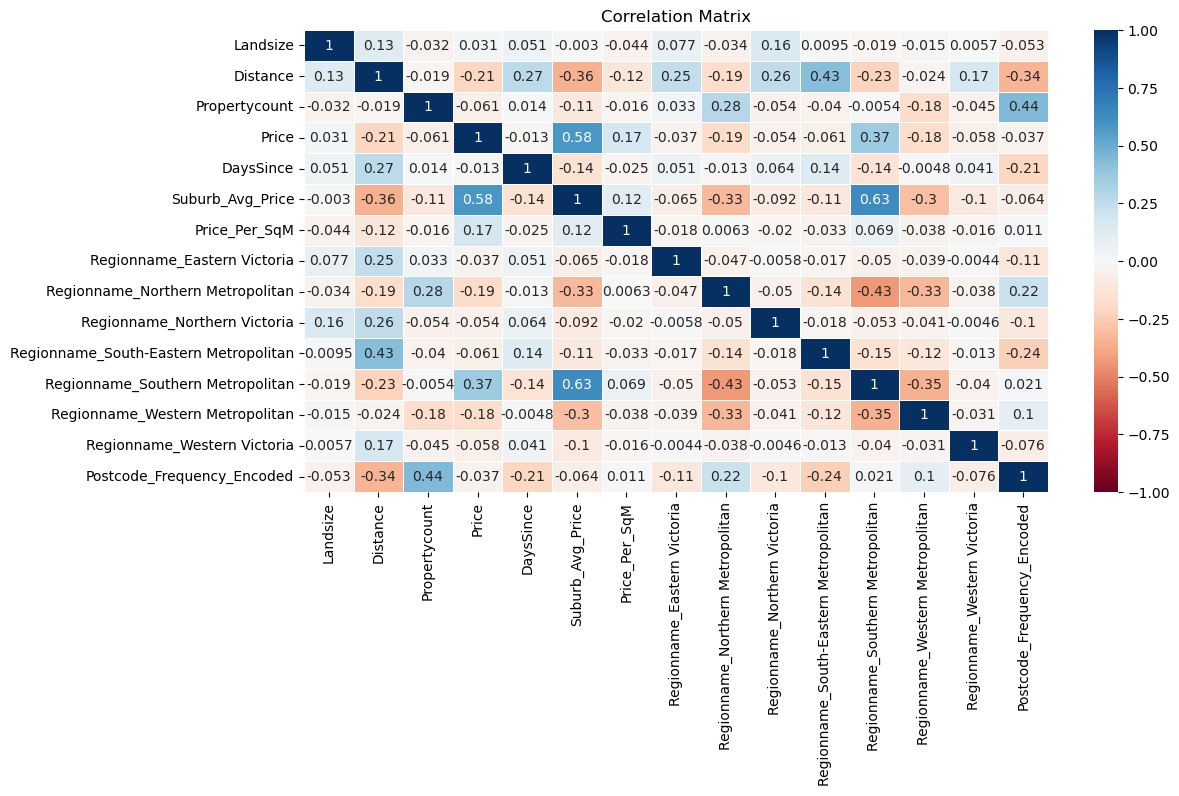

In [142]:
# Checking for correlation among features
display(mel_4.corr()['Price'].sort_values(ascending=False))

mel_4corr = mel_4.corr()

# Visualizing the relationship
plt.figure(figsize=(12, 6))
sns.heatmap(mel_4corr, annot=True, cmap='RdBu', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# 4. Model Training and Evaluation

## Task 4.1: Split the dataset into training and testing sets.

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
# defining our X (target variable) and y (predictor features)

X = mel_4.drop(columns = 'Price', axis = 1)
y = mel_4['Price']

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [148]:
print(X_train.shape)
print(X_test.shape)

(21646, 14)
(5412, 14)


## Task 4.2: Choose and justify the selection of machine learning algorithms

**Linear Regression** is a strong choice for predicting house prices due to its ability to model relationships between continuous variables. Linear regression assumes a linear relationship between the dependent variable (house prices) and independent variables (features), making it suitable for predicting trends where this assumption holds. 
It also offers interpretability, allowing you to assess the contribution of each feature to the final prediction. Additionally, it's computationally efficient, making it useful for large datasets. However, it works best when relationships are linear and multicollinearity is low

**Decision Trees**  is being used directly for regression (predicting house prices) because they split the data based on feature values that lead to the best predictions of the target variable, which in this case is the Price. 

Interpretability: The tree structure is easy to interpret and visualize, which can help in understanding how different features (like Suburb, Landsize, Distance, etc.) influence house prices.
Non-Linearity: Decision Trees can capture non-linear relationships between features and the target variable, which is useful in complex datasets like real estate

**Random Forest** is an ensemble of Decision Trees and can be used for regression. It improves upon individual Decision Trees by reducing overfitting and increasing prediction accuracy.
Robustness: It’s less prone to overfitting compared to a single Decision Tree because it averages multiple trees.
Feature Importance: Random Forest provides estimates of feature importance, helping you understand which features are most influential in predicting house prices.

## Task 4.3: Train multiple models and evaluate their performance using appropriate metrics 

### Linear Regression Model

In [153]:
from sklearn.linear_model import LinearRegression

In [154]:
# creating an instance of linear regression lm
lm = LinearRegression()

In [155]:
# Fit model
lm.fit(X_train, y_train)

LinearRegression()

In [156]:
# Predicting the values of the X-test
lm_pred = lm.predict(X_test)

In [157]:
lm.coef_

array([ 2.16930460e-01, -7.66028275e-03, -1.73421776e-03,  2.75622061e-02,
        2.74740718e-01,  1.49161763e+00, -7.06953267e-04, -1.44134129e-03,
       -6.92588548e-03, -6.83796435e-05,  1.52628421e-03, -1.51770900e-04,
        1.03389778e-03,  7.61957480e-03])

In [158]:
# Get the coefficients
feature_contributions = pd.Series(lm.coef_, index=X_train.columns)
print(feature_contributions)

Landsize                                 0.22
Distance                                -0.01
Propertycount                           -0.00
DaysSince                                0.03
Suburb_Avg_Price                         0.27
Price_Per_SqM                            1.49
Regionname_Eastern Victoria             -0.00
Regionname_Northern Metropolitan        -0.00
Regionname_Northern Victoria            -0.01
Regionname_South-Eastern Metropolitan   -0.00
Regionname_Southern Metropolitan         0.00
Regionname_Western Metropolitan         -0.00
Regionname_Western Victoria              0.00
Postcode_Frequency_Encoded               0.01
dtype: float64


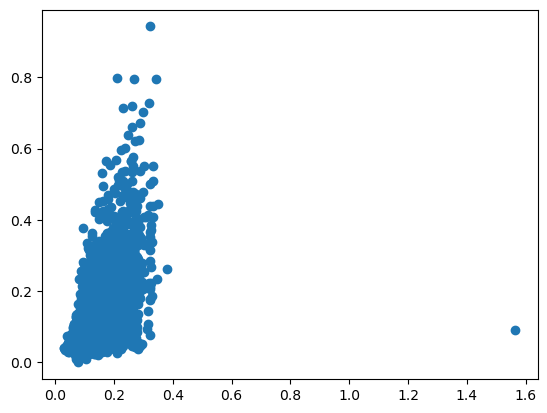

In [159]:
plt.scatter(y = y_test, x = lm_pred)

<Axes: xlabel='Price', ylabel='Density'>

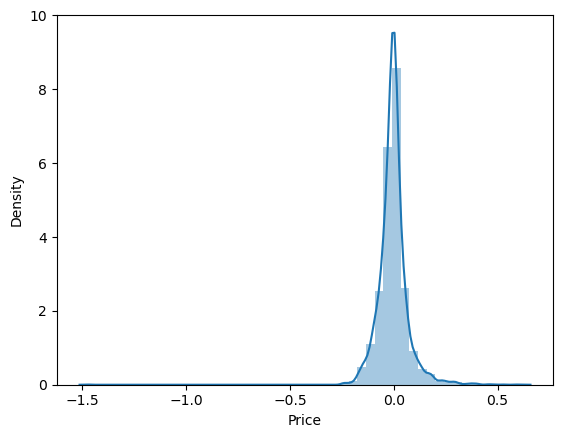

In [160]:
sns.distplot(y_test - lm_pred, kde = True)

In [161]:
print(lm_pred[:5])
print(y_test.head().tolist())

[0.20754934 0.07641357 0.08051411 0.13300736 0.09874032]
[0.21200289226319596, 0.09399855386840204, 0.05422993492407811, 0.22631959508315258, 0.06724511930585685]


In [162]:
pred = pd.DataFrame({"y_test": y_test , "lm_pred": lm_pred})
pred

,y_test,lm_pred
30849,0.21,0.21
29464,0.09,0.08
23472,0.05,0.08
12043,0.23,0.13
18221,0.07,0.10
...,...,...
31486,0.11,0.16
6707,0.10,0.09
11092,0.13,0.11
428,0.15,0.22


#### Evaluation metrics for Linear Regression

In [164]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

In [165]:
# Evaluating the result with different metrics

print("Mean Squared Error (MSE):", mean_squared_error(y_test, lm_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, lm_pred)))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, lm_pred))
print("R-squared Score (R²):", r2_score(y_test, lm_pred))

Mean Squared Error (MSE): 0.005202438761262829
Root Mean Squared Error (RMSE): 0.07212793329399386
Mean Absolute Error (MAE): 0.045975542530365676
R-squared Score (R²): 0.3219821889023501


The MSE, RMSE, and MAE values are relatively low, as they reflect less error in the predictions of your regression model. 
The low R^2 value does not indicate a better fit of the model to the data. R² of **0.3220** **(32%)** suggests that while the model has captured some of the relationships between the predictor variables and the house prices, there is still a significant portion of variability **(67.8%)** that is unexplained.

This indicates that the linear relationship between the selected features and the target variable might not be strong

## Decison Trees 

In [168]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Split the data into various tests and train the test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [169]:
# Train a Decision Tree Regressor
# I'm deciding not to use any parameter I will use it when doing hyperparameters
dt_model = DecisionTreeRegressor(random_state = 42)

In [170]:
# fit the model
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [171]:
dt_pred = dt_model.predict(X_test)

#### Evaluation metrics for Decision trees

In [173]:
# Checking various evaluation metrics for our predicted values

print("Mean Squared Error (MSE):", mean_squared_error(y_test, dt_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, dt_pred)))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, dt_pred))
print("R-squared Score (R²):", r2_score(y_test, dt_pred))

Mean Squared Error (MSE): 0.00037592398753337486
Root Mean Squared Error (RMSE): 0.019388759308768957
Mean Absolute Error (MAE): 0.006452204704042703
R-squared Score (R²): 0.9510069852115647


**MSE** Since the MSE is small, this suggests that the model is generally making accurate predictions, with small deviations from the actual values. However, because the errors are squared, this metric can be sensitive to large outliers

**RMSE** is a more interpretable metric compared to MSE because it is in the same units as the dependent variable. A low RMSE suggests that the model has good predictive accuracy. The small value of 0.0196 indicates that the model's predictions are quite close to the true values.


**MSE** - The low MAE value suggests that the model is performing well, with relatively small average errors. This reinforces the conclusion that the model is making accurate predictions.

R^2 This is a strong R² score, indicating that the model captures most of the variability in the data and explains it well. A high R² like this suggests that your model is well-fitted and effective at explaining the patterns in your data

## Random Forest

In [176]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [177]:
# fit the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [178]:
rf_pred = rf_model.predict(X_test)
rf_pred

array([0.20859581, 0.09424657, 0.05466667, ..., 0.13032972, 0.15188576,
       0.18164136])

#### Evaluation metrics for Random Forest

In [180]:
# Evaluating the model using various metrics

print("Mean Squared Error (MSE):", mean_squared_error(y_test, rf_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, rf_pred)))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, rf_pred))
print("R-squared Score (R²):", r2_score(y_test, rf_pred))

Mean Squared Error (MSE): 0.00019204707443672793
Root Mean Squared Error (RMSE): 0.013858105008864955
Mean Absolute Error (MAE): 0.003948658257027914
R-squared Score (R²): 0.9749710966312863


**RMSE** - This is a very small RMSE, which suggests that the Random Forest model's predictions are highly accurate and close to the actual values.

**MAE** An MAE of 0.0039 indicates that, on average, the model’s predictions are off by only 0.0039 units. A low MAE suggests that the model is not only accurate but also robust to outliers, given that it doesn’t square the errors. 
This confirms that the deviations between predictions and actual values are minimal.

**R^2** This is an excellent R² value, indicating that the model captures nearly all the variability in the data, leaving very little unexplained variance. This suggests that the model is very well-fitted to the data

In [182]:
# For better analysis within different models I created a function to easily view the differences between various evaluation metrics
# Function to print evaluation metrics
def evaluate_model(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R²: {r2}")

# Linear Regression Metrics
print("Linear Regression Metrics:")
evaluate_model(y_test, lm_pred)

# Decision Tree Metrics
print("\nDecision Tree Metrics:")
evaluate_model(y_test, dt_pred)

# Random Forest Metrics
print("\nRandom Forest Metrics:")
evaluate_model(y_test, rf_pred)


Linear Regression Metrics:
MAE: 0.045975542530365676
MSE: 0.005202438761262829
RMSE: 0.07212793329399386
R²: 0.3219821889023501

Decision Tree Metrics:
MAE: 0.006452204704042703
MSE: 0.00037592398753337486
RMSE: 0.019388759308768957
R²: 0.9510069852115647

Random Forest Metrics:
MAE: 0.003948658257027914
MSE: 0.00019204707443672793
RMSE: 0.013858105008864955
R²: 0.9749710966312863


## Task 4.4: Perform hyperparameter tuning to optimize the model's performance

### HyperParameterTuning for Linear Regression

In [185]:
## Using ridge regressor

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for Ridge Regression
ridge_params = {'alpha': [0.1, 1.0, 10.0]}

In [186]:
# Creating an instance of the ridge model
ridge_model = Ridge()
ridge_grid = GridSearchCV(ridge_model, ridge_params, scoring='neg_mean_squared_error', cv=5)

In [187]:
ridge_grid.fit(X_train, y_train)

print(f"Best Parameters for Ridge Regression: {ridge_grid.best_params_}")

Best Parameters for Ridge Regression: {'alpha': 1.0}


In [188]:
# Re-train the Ridge model using the best alpha
best_ridge_model = Ridge(alpha=1.0)
best_ridge_model.fit(X_train, y_train)

Ridge()

In [189]:
# Make predictions with the tuned model
ridge_predictions = best_ridge_model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, ridge_predictions)
r2 = r2_score(y_test, ridge_predictions)

print(f"Mean Squared Error (MSE) with tuned Ridge Regression: {mse}")
print(f"R² Score with tuned Ridge Regression: {r2}")

Mean Squared Error (MSE) with tuned Ridge Regression: 0.005031200847257521
R² Score with tuned Ridge Regression: 0.3442990985208353


There isn't much difference between the initial linear regression model and the tuned 

### Using Cross Validation to evaluate model performance for all three models

#### I am using Cross-validation to ensure that the model generalizes well to unseen data, minimizing the problem of overfitting.


In [193]:
from sklearn.model_selection import cross_val_score

# Initialize the model
lr_model = LinearRegression()

# Perform 5-fold cross-validation
lr_cv_scores = cross_val_score(lr_model, X, y, cv=5, scoring='r2')

# Output the mean R² score across the folds
print(f"Linear Regression Cross-Validation R²: {lr_cv_scores.mean()}")


Linear Regression Cross-Validation R²: 0.33854762742648037


### HyperParameterTuning for Decsion trees

In [195]:
# defining the parameters
parameters = {
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10], 
    'max_leaf_nodes':[5, 25, 50, 100, 250, 500]
}
dt = DecisionTreeRegressor(random_state = 42)
dt_grid = GridSearchCV(dt, parameters, scoring='neg_mean_squared_error', cv=5)
dt_grid.fit(X_train, y_train)

print(f"Best Parameters for Decision Tree: {dt_grid.best_params_}")

Best Parameters for Decision Tree: {'max_depth': 10, 'max_leaf_nodes': 500, 'min_samples_split': 5}


In [196]:
# Re-train the DecisionTreeRegressor using the best parameters
dt= DecisionTreeRegressor(max_depth = 10, max_leaf_nodes = 500, min_samples_split = 5)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, max_leaf_nodes=500, min_samples_split=10)

In [197]:
# Make predictions with the tuned model
dt_predictions = dt.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, dt_predictions)
rmse = np.sqrt(mean_squared_error(y_test, dt_predictions))
mae = mean_absolute_error(y_test, dt_predictions)
r2 = r2_score(y_test, dt_predictions)

print(f"Mean Squared Error (MSE) with tuned Decision Tree Regression : {mse}")
print(f"Mean Squared Error (MSE) with tuned Decision Tree Regression: {rmse}")
print(f"Mean Squared Error (MSE) with tuned Decision Tree Regression: {mae}")
print(f"R² Score with tuned Decision Tree Regression: {r2}")

Mean Squared Error (MSE) with tuned Decision Tree Regression : 0.0003171269218283347
Mean Squared Error (MSE) with tuned Decision Tree Regression: 0.017808057778105246
Mean Squared Error (MSE) with tuned Decision Tree Regression: 0.009797844005356892
R² Score with tuned Decision Tree Regression: 0.9586698255865697


#### Cross-validation

In [199]:
# Initialize the model
dt_model = DecisionTreeRegressor(max_depth=10, random_state=42)

# Perform 5-fold cross-validation
dt_cv_scores = cross_val_score(dt_model, X, y, cv=5, scoring='r2')

# Output the mean R² score across the folds
print(f"Decision Tree Cross-Validation R²: {dt_cv_scores.mean()}")

Decision Tree Cross-Validation R²: 0.9415605687295571


### HyperParameterTuning for Random Forest

In [201]:
# defining the parameters
rf_params = {'n_estimators': [100, 200], 'max_depth': [10, 20, 30]}

rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, scoring='neg_mean_squared_error', cv=5)
rf_grid.fit(X_train, y_train)

print(f"Best Parameters for Random Forest: {rf_grid.best_params_}")

Best Parameters for Random Forest: {'max_depth': 10, 'n_estimators': 200}


## Task 4.5: Select and evaluate the best-performing model on the testing set

### Random Forest is the best performing model

In [204]:
# Re-train the RandomForestRegressor using the best parameters
rf= RandomForestRegressor(max_depth = 10, n_estimators = 200)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=200)

In [205]:
# Make predictions with the tuned model
rf_predictions = rf.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, rf_predictions)
rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
mae = mean_absolute_error(y_test, rf_predictions)
r2 = r2_score(y_test, rf_predictions)

print(f"Mean Squared Error (MSE) with tuned Random Forest Regression : {mse}")
print(f"Mean Squared Error (MSE) with tuned Random Forest Regression: {rmse}")
print(f"Mean Squared Error (MSE) with tuned Random Forest Regression: {mae}")
print(f"R² Score with tuned Random Forest Regression: {r2}")

Mean Squared Error (MSE) with tuned Random Forest Regression : 0.00015779910976102183
Mean Squared Error (MSE) with tuned Random Forest Regression: 0.012561811563664765
Mean Squared Error (MSE) with tuned Random Forest Regression: 0.004927691548152547
R² Score with tuned Random Forest Regression: 0.979434528323529


#### Cross-validation

In [207]:
# Initialize the model
Rf_model = RandomForestRegressor(max_depth=10, n_estimators = 200,random_state=42)

# Perform 5-fold cross-validation
Rf_cv_scores = cross_val_score(Rf_model, X, y, cv=5, scoring='r2')

# Output the mean R² score across the folds
print(f"Random Forest Cross-Validation R²: {Rf_cv_scores.mean()}")

Random Forest Cross-Validation R²: 0.9688543176429156


In [208]:
# Printing the evaluation metrics after Tuning

def evaluate_model(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R²: {r2}")

# Linear Regression Metrics
print("Linear Regression Metrics:")
evaluate_model(y_test, ridge_predictions)

# Decision Tree Metrics
print("\nDecision Tree Metrics:")
evaluate_model(y_test, dt_predictions)

# Random Forest Metrics
print("\nRandom Forest Metrics:")
evaluate_model(y_test, rf_predictions)

Linear Regression Metrics:
MAE: 0.046322432650783625
MSE: 0.005031200847257521
RMSE: 0.07093095831340164
R²: 0.3442990985208353

Decision Tree Metrics:
MAE: 0.009797844005356892
MSE: 0.0003171269218283347
RMSE: 0.017808057778105246
R²: 0.9586698255865697

Random Forest Metrics:
MAE: 0.004927691548152547
MSE: 0.00015779910976102183
RMSE: 0.012561811563664765
R²: 0.979434528323529


# 5. Model Interpretation and Reporting

## Task 5.1: Interpret the results of the best-performing model and explain the importance of critical features

**Advantage of Random Forest over Linear regression and Decision Trees** 


**High Predictive Power**: The combination of very low MSE, RMSE, and MAE values indicates that your Random Forest model makes highly accurate predictions with minimal error. The small error metrics suggest that the model performs exceptionally well on the data.

**Strong Fit**: The R² score of 0.9794 after performing hyperparameter confirms that the model fits the data very well, capturing almost all of the variance in the dependent variable. This suggests that the model is effective in explaining the relationships within the data.

**Robustness**: The low MAE indicates that the model's performance is consistent across the dataset and is not disproportionately affected by outliers. The Random Forest model is known for its robustness due to its ensemble nature, which helps reduce variance and prevents overfitting.

**Comparison to Decision Tree**: When compared to the metrics from the decision tree model, the Random Forest shows a notable improvement across all metrics:

The MSE and RMSE are lower in the Random Forest model, indicating that the overall errors are smaller.
The MAE is also significantly reduced, showing that the model's average error is smaller and more consistent.
The R² score is higher in the Random Forest, meaning it explains more of the variance in the target variable.

Importantce of Critical Features

Identifying and understanding the critical features of the model is important for improving model performance and interpreting the results. In the context of predicting house prices, critical features are those that have the most significant impact on the predictions. Let's consider some of the features you might be using:

**Distance to CBD**

Proximity to the Central Business District (CBD) is often a major driver of house prices. Properties closer to the city center tend to have higher values due to better access to jobs, amenities, and transportation. 

**Suburb or Region name**

The suburb or neighborhood is critical since property values can vary significantly across different areas. Suburb or Region name are used as a categorical feature, the Suburb column was dropped, and a target encoding was used to capture the average house price within each Suburb (Suburb_Avg_Price) This feature acts as a contextual indicator, helping the model understand the typical price level in each suburb. Properties in more expensive suburbs are likely to be more expensive themselves. 
The regionname was handled with one hot encoding to capture regional effects on pricing.

**Landsize**

Larger land sizes generally increase property value, especially in suburban or rural areas. However, in urban areas, the effect of land size might be diminished relative to location and other factors. I

**Time Since Sale (from Date)**

Real estate prices often fluctuate over time due to market conditions, economic factors, and seasonal trends. This feature captures temporal trends in the housing market, such as price appreciation over time. It helps the model account for the influence of market trends on property prices.



## Task 5.2: Create visualizations to support your findings and model interpretations

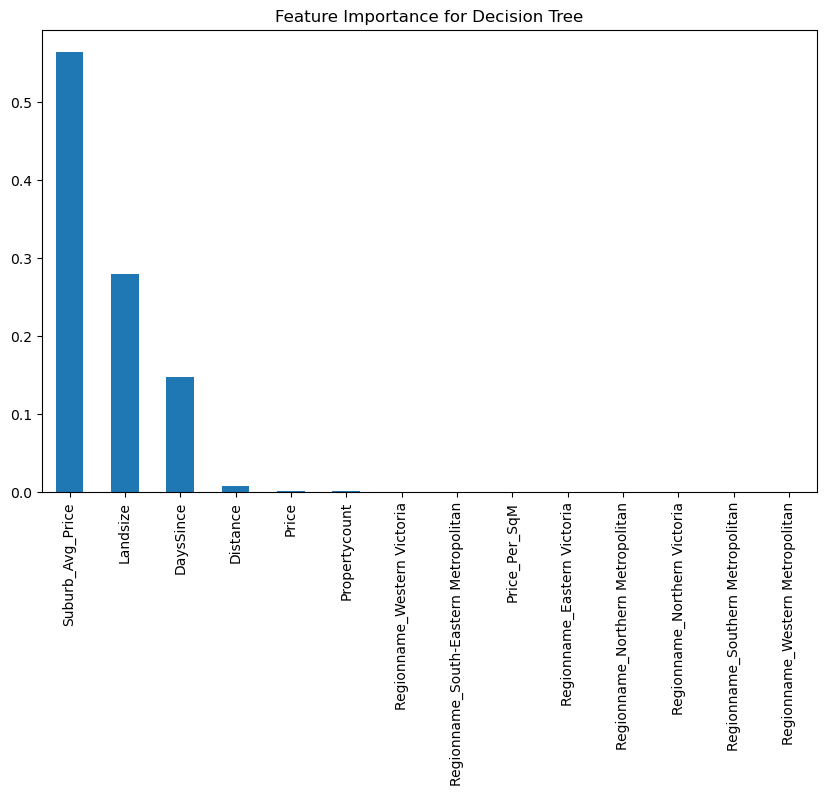

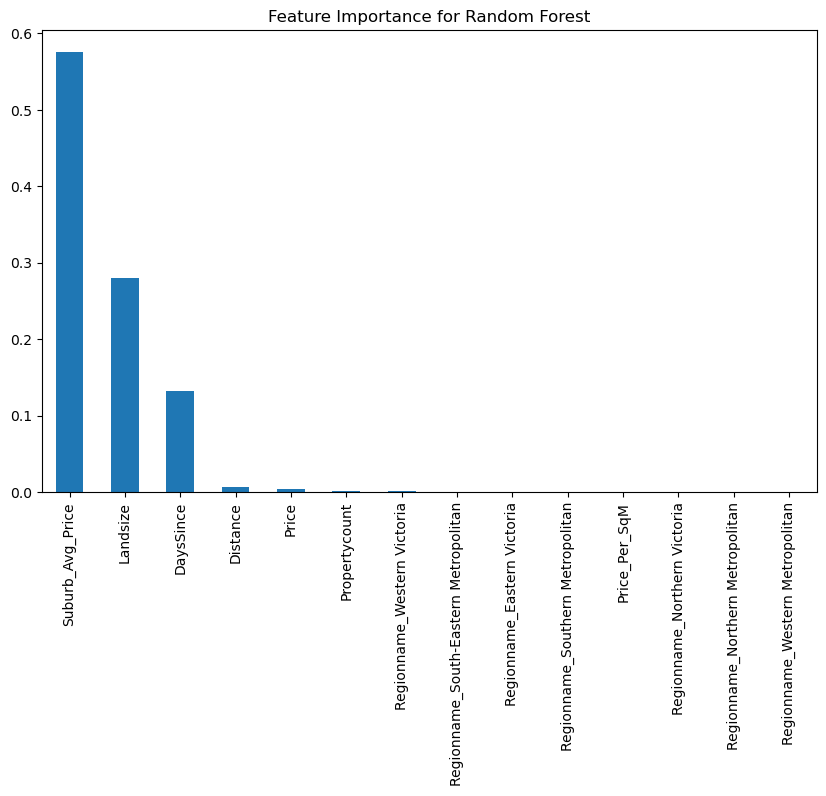

In [216]:
# Extracting feature importances from the models
dt_feature_importance = pd.Series(dt.feature_importances_, index=mel_4.columns[:-1])
rf_feature_importance = pd.Series(rf.feature_importances_, index=mel_4.columns[:-1])

# Plotting Decision Tree feature importances
plt.figure(figsize=(10, 6))
dt_feature_importance.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance for Decision Tree')
plt.show()

# Plotting Random Forest feature importances
plt.figure(figsize=(10, 6))
rf_feature_importance.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance for Random Forest')
plt.show()


#### From the above visualization Suburb_Avg_Price had the most influence on random forest model

## Task 5.3: Write a comprehensive report summarizing the project, including the methodology, results, and conclusions

### **Comprehensive Project Report: Predicting House Prices Using Machine Learning Algorithms**

#### **1. Introduction**

The objective of this project was to developaa m-chine learning model to predict house prices in Melbourne, Australia. Given the location-specific features and property characteristics, we used three machine learning algorithms: **Linear Regression**, **Decision Trees**, and **Random Forests**. Our aim was to leverage these models to understand the factors affecting house prices and make accurate predictions.

This report outlines the methodology, results, and conclusions of the project. We provide insights into data preprocessing, feature engineering, model performance, and the evaluation of the three machine learning a

---

#### **2. Methodology**

##### **2.1. Data Overview**

- **Source:** The dataset was collected from Kaggle, and the full dataset can be accessed here: [Melbourne Housing Dataset](https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market/data?select=Melbourne_housing_FULL.csv).
- **Initial Shape:** The dataset consisted of 34,857 records and 8 features of interest after cleaning.
  
##### **2.2. Data Collection, Cleaning, and Preprocessing**

- **Features of Interest:**
  - `Suburb`: Suburb name
  - `Landsize`: Land Size in square meters
  - `Distance`: Distance from the Central Business District (CBD)
  - `Postcode`: Postal code of the property
  - `Regionname`: General region name (e.g., West, North East, etc.)
  - `Propertycount`: Number of properties in the suburb
  - `Date`: Date when the property was sold
  - `Price`: House price (target variable)

- **Handling Duplicates:** 631 duplicate records were removed from the dataset, reducing the dataset size to 34,226 entries.
  
- **Handling Missing Values:**
  - **Landsize:** 11,257 missing values (33%) were imputed using the median landsize within each `Suburb` and `Regionname`.
  - **Price:** 7,040 missing values (21%) were removed, as this was the target variable, and imputing it could introduce bias.
  - **Distance, Postcode, Regionname, and Propertycount:** These features had negligible missing values and were dropped.

##### **2.3. Exploratory Data Analysis and Data Distribution**

- **Skewness and Kurtosis:** The target variable `Price` had a skewness of 2.58 and kurtosis of 13.05, indicating a right-skewed distribution with a high concentration of outliers.
  
- **Feature Skewness and Kurtosis:**
  - `Landsize`: Skewness of 105.22 and kurtosis of 13,824.10, indicating extreme outliers.
  - `Distance`: Skewness of 1.47 and kurtosis of 3.46, also showing right-skewness.
  - `Postcode`, `Propertycount`, and `Price` exhibited moderate skewness and kurtosis.

- **Handling Outliers:** Outliers were handled by setting limits on the following variables:
  - **Postcode:** Filtered to values ≤ 3900.
  - **Price:** Filtered to values ≤ 7,000,000.
  - **Landsize:** Filtered to values ≤ 100,000.

##### **2.4. Feature Engineering**

Several new features were created to enhance the model's predictive power:
1. **DaysSince:** The number of days since the property was sold (derived from `Date`).
2. **PriceClass:** Categorized house prices into different classes (eventually dropped).
3. **Suburb_Avg_Price:** The average price of houses in each suburb, to capture regional price differences.
4. **Price_per_SquareMetre:** Calculated as `Price` divided by `Landsize`.

##### **2.5. Encoding Categorical Variables**

- **Suburb:** Dropped due to the large number of categories (327 categories) and replaced with `Suburb_Avg_Price`.
- **Regionname:** One-hot encoded due to its small number of categories.
- **Frequency Encoding:** Applied to `Suburb` for use in model training.

##### **2.6. Standardization and Normalization**

The dataset was standardized and normalized to improve the performance of the models, particularly for distance-based models such as Decision Trees and Random Forests.

##### **2.7. Model Training and Evaluation Metrics**

Three machine learning algorithms were employed:
- **Linear Regression**
- **Decision Trees**
- **Random Forests**

The models were evaluated using the following metrics:
- **Mean Absolute Error (MAE)**
- **Mea Error (MSE)**
- **Root Mean Squared Error (RMSE)**
- **R-squared (R²)**

---

#### **3. Results**

##### **3.1. Model Performance Before Hyperparameter Tuning**

| **Metric**          | **Linear Regression** | **Decision Tree** | **Random Forest** |
|---------------------|-----------------------|-------------------|-------------------|
| **MAE**             | 0.0460                | 0.0065            | 0.0039            |
| **MSE**             | 0.0052                | 0.0004            | 0.0002            |
| **RMSE**            | 0.0721                | 0.0194            | 0.0139            |
| **R²**              | 0.3220                | 0.9510            | 0.9750            |

##### **3.2. Model Performance After Hyperparameter Tuning**

After optimizing hyperparameters using **GridSearchCV**, the model performance improved as follows:

| **Metric**          | **Linear Regression** | **Decision Tree** | **Random Forest** |
|---------------------|-----------------------|-------------------|-------------------|
| **MAE**             | 0.0463                | 0.0098            | 0.0049            |
| **MSE**             | 0.0050                | 0.0003            | 0.0002            |
| **RMSE**            | 0.0709                | 0.0178            | 0.0126            |
| **R²**              | 0.3443                | 0.9587            | 0.9794            |
| **Random Forest Cross-Validation R²** | - | - | **0.9689** |

##### **3.3. Key Observations**

- **Linear Regression:** The linear regression model struggled to explain the variability in house prices, with an R² of only 0.3443. This indicates that the linear relationship between the features and the target variable is weak.
  
- **Decision Tree:** The decision tree model performed significantly better with an R² of 0.9587 after hyperparameter tuning. It managed to capture non-linear relationships between the features and house prices.
  
- **Random Forest:** The Random Forest model outperformed both Linear Regression and Decision Trees, with an R² of 0.9794. It was the best-performing model, capturing complex interactions bet
res while maintaining robustness. Cross-validation further validated its consistency, with an R² of 0.9689.

---

#### **4. Conclusions**

##### **4.1. Summary of Findings**

- **Model Comparison:** Random Forest emerged as the best-performing model, with an R² of 0.9794, indicating that it explained nearly 98% of the variance in house prices. Decision Trees also performed well, though slightly less effectively than Random Forests. Linear Regression, while interpretable, was not as effective for this dataset, as the relationships between features and house prices appeared to be non-linear.

- **Feature Importance:** Key features driving house prices included `Distance` to the CBD, `Landsize`, `Suburb_Avg_Price`, and regional factors (`Regionname`). Random Forest's ability to model complex interactions between these features contributed to its superior performance.

##### **4.2. Recommendations**

- **Improving Model Performance:** Future work could focus on exploring more complex models such as Gradient Boosting Machines (GBM) or XGBoost, which could capture even finer details in the data.
  
- **Further Feature Engineering:** Incorporating more location-based features, such as proximity to schools, public transport, or crime rates, could improve the model's ability to predict house prices.
  
- **Model Deployment:** Given the strong performance of the Random Forest model, it could be deployed as a predictive tool for real estate investors, urban planners, or property buyers to assess house prices based on key location-specific features.

##### **4.3. Final Thoughts**

This project successfully demonstrated the application of machine learning models to predict house prices using location-based features. The Random Forest model's strong performance highlights the importance of capturing non-linear interactions and suggests that more complex models are better suited for this type of prediction task.